In [1]:
conda install -c anaconda ipython

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import datasets, model_selection, linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from catboost import CatBoostClassifier

from xgboost import XGBClassifier, plot_importance

from lightgbm import LGBMClassifier
from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')

<br>

## 1. Preparing dataset

In [2]:
# train_df = pd.read_csv("titanic.csv")
# test_df = pd.read_csv("test.csv")

# RANDOM_STATE = 0
# FOLDS = 5
# STRATEGY = 'median' 

In [3]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP   
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e 39.00  False  \
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e 24.00  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e 58.00   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name   
0         0.00       0.00          0.00    0.00    0.00  Maham Ofracculy  \
1       109.00       9.00         25.00  549.00   44.00     Juanna Vines   
2        43.00    3576.00          0.00 6715.00   49.00    Altark Susent   

   Transported  
0        False  
1         True  
2        False

<br> <br> 

## Data info
<br> 

- **PassengerId** : A unique Id for each passenger. <br>Each Id takes the form **gggg_pp** where **gggg** indicates **a group the passenger is travelling with** and **pp** is **their number within the group**. <br> People in a group are often family members, but not always.<br><br>  

- **HomePlanet** : The planet the passenger departed from, typically their planet of permanent residence.<br><br>  

- **CryoSleep** : Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. <br> Passengers in cryosleep are confined to their cabins.<br><br>  

- **Cabin** : The cabin number where the passenger is staying. <br> Takes the form **deck/num/side**, where **side** can be either **P for Port** or **S for Starboard**.<br><br>  

- **Destination** : The planet the passenger will be debarking to.<br><br>  

- **Age** : The age of the passenger.<br><br>  

- **VIP** : Whether the passenger has paid for special VIP service during the voyage.<br><br>  

- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** : Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br><br>  

- **Name** : The first and last names of the passenger.<br><br>  

- **Transported** : Whether the passenger was transported to another dimension. <br> This is **the target**, the column you are trying to predict.<br><br>  

In [4]:
y_data = data_df[['Transported']]
# y_data.head(3)

In [5]:
del data_df['Transported']
x_data = data_df.copy()
# x_data.head(3)

In [6]:
train_df = x_data

In [7]:
target_df = y_data

In [8]:
train_df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP   
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e 39.00  False  \
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e 24.00  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e 58.00   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e 33.00  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e 16.00  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e 41.00   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22 18.00  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e 26.00  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e 32.00  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e 44.00  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  
0            0.00       0.00          0.00    0.00    0.00    Maham Ofracculy  
1          109.00       9.00         25.00  549.00   44.00       Juanna Vines  
2           43.00    3576.00          0.00 6715.00   49.00      Altark Susent  
3            0.00    1283.00        371.00 3329.00  193.00       Solam Susent  
4          303.00      70.00        151.00  565.00    2.00  Willy Santantines  
...           ...        ...           ...     ...     ...                ...  
8688         0.00    6819.00          0.00 1643.00   74.00  Gravior Noxnuther  
8689         0.00       0.00          0.00    0.00    0.00    Kurta Mondalley  
8690         0.00       0.00       1872.00    1.00    0.00       Fayey Connon  
8691         0.00    1049.00          0.00  353.00 3235.00   Celeon Hontichre  
8692       126.00    4688.00          0.00    0.00   12.00   Propsh Hontichre  

[8693 rows x 13 columns]

In [9]:
target_df

Transported
0           False
1            True
2           False
3           False
4            True
...           ...
8688        False
8689        False
8690         True
8691        False
8692         True

[8693 rows x 1 columns]

<br>

## 2. Feature engineering & Feature selection

In [10]:
print(f'\033[94mNumber of rows in data_df : {train_df.shape[0]}')
print(f'\033[94mNumber of rows in data_df : {train_df.shape[1]}')
print(f'\033[94mNumber of values in data_df : {train_df.value_counts().sum()}')
print(f'\033[94mNumber of missing values in data_df :{sum(train_df.isna().sum())}')

Number of rows in data_df : 8693
Number of rows in data_df : 13
Number of values in data_df : 6606
Number of missing values in data_df :2324


In [11]:
print(f'\033[94m')
print(train_df.isna().sum().sort_values(ascending = False))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
dtype: int64


In [12]:
train_df.describe() #수치형 데이터 확인

Age  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck
count 8514.00      8512.00    8510.00       8485.00  8510.00  8505.00
mean    28.83       224.69     458.08        173.73   311.14   304.85
std     14.49       666.72    1611.49        604.70  1136.71  1145.72
min      0.00         0.00       0.00          0.00     0.00     0.00
25%     19.00         0.00       0.00          0.00     0.00     0.00
50%     27.00         0.00       0.00          0.00     0.00     0.00
75%     38.00        47.00      76.00         27.00    59.00    46.00
max     79.00     14327.00   29813.00      23492.00 22408.00 24133.00

In [13]:
train_df.describe(include=['O']) #범주형 데이터 확인

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP   
count         8693       8492      8476     8494         8511   8490  \
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2

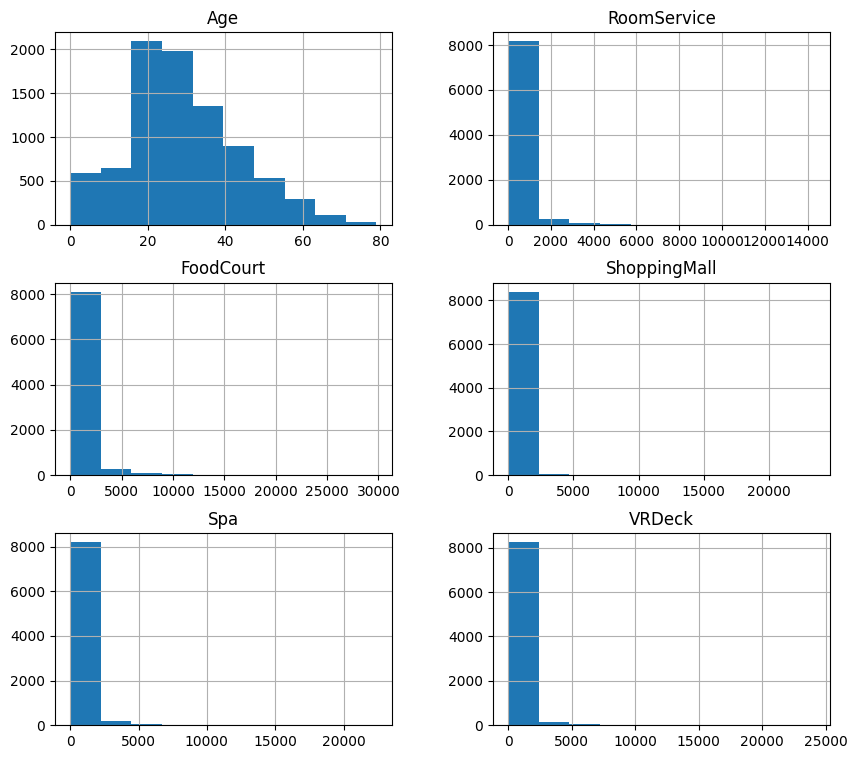

In [14]:
# 데이터 범위 확인
train_df.hist(figsize=(10, 9))
plt.show()

In [15]:
# 결측치 대체할 method 작성
replace_set = {f'{train_df.columns[0]}':train_df[train_df.columns[0]].mode()[0]}

In [16]:
# data 컬럼을 배열값으로 찾아 데이터 타입이 'object'일 때는 최빈값으로 결측치를 대체, float일 경우는 중간값으로 대체하였습니다. 

for i in range(len(train_df.columns)):
    if train_df[train_df.columns[i]].dtype == 'O':
        replace_set = {f'{train_df.columns[i]}':train_df[train_df.columns[i]].mode()[0]}
        train_df.fillna(replace_set, inplace = True)
    else:
        replace_set = {f'{train_df.columns[i]}':train_df[train_df.columns[i]].median()}
        train_df.fillna(replace_set, inplace = True)

In [17]:
# 결측치가 없는것을 확인 (Name 제외)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 764.2+ KB


In [18]:
# Cabin 분할 - Cabin의 값을 객실의 종류, 호수, 방 위치로 분할
cb = train_df["Cabin"].apply(lambda x: x.split("/"))

train_df["Cabin Deck"] = cb.apply(lambda x: x[0])
train_df["Cabin Num"] = cb.apply(lambda x: float(x[1]))
train_df["Cabin Side"] = cb.apply(lambda x: x[2])

In [19]:
# #필요 없는 column drop
# # Cabin은 위에서 분할하여 사용하기 때문에 drop을 하고,
# # Id와 Name은 도착여부와 상관이 없을 것이라고 예상하기 때문에 train_df에서 drop
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

In [20]:
# # bool형 int로 변경
train_df["VIP"] = train_df["VIP"].astype(int)
train_df["CryoSleep"] = train_df["CryoSleep"].astype(int)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Cabin Deck    8693 non-null   object 
 11  Cabin Num     8693 non-null   float64
 12  Cabin Side    8693 non-null   object 
dtypes: float64(7), int32(2), object(4)
memory usage: 815.1+ KB


### EDA

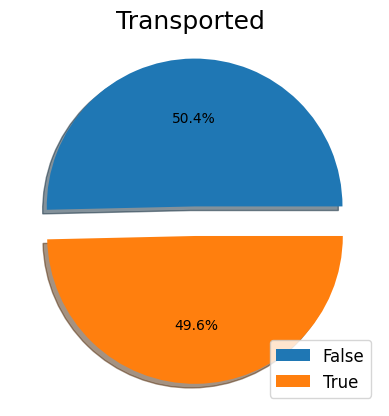

In [26]:

plt.pie(target_df.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.title('Transported ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

<Axes: xlabel='Transported', ylabel='count'>

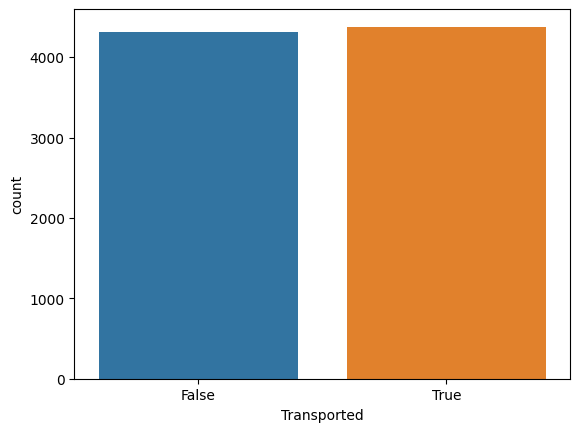

In [27]:
sns.countplot(x=target_df.Transported)

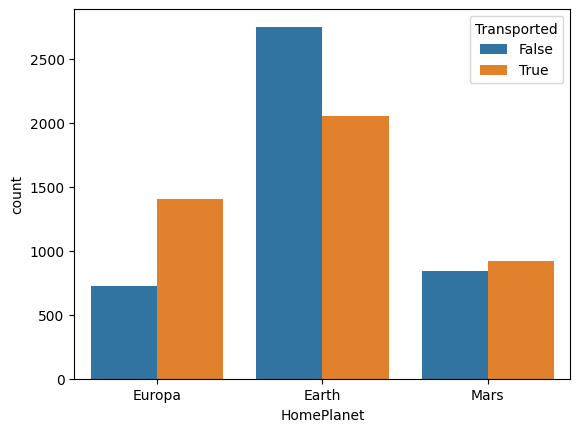

In [28]:
# HomePlanet
sns.countplot(x=train_df.HomePlanet,hue=target_df.Transported);

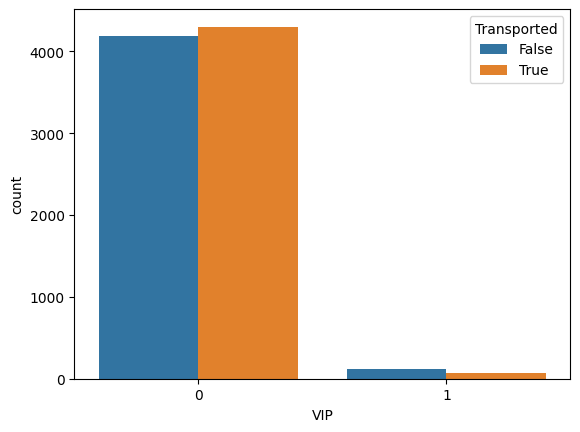

In [29]:
# VIP
sns.countplot(x=train_df.VIP,hue=target_df.Transported);

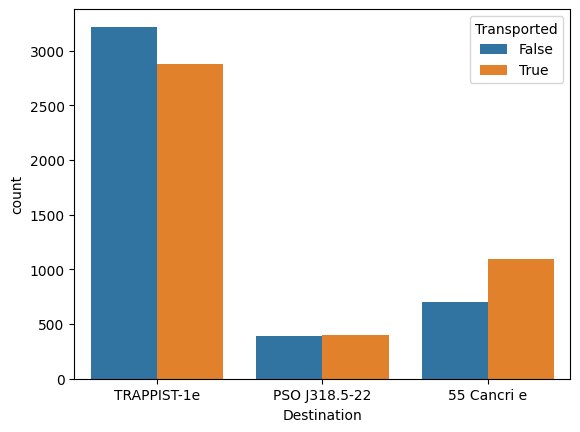

In [30]:
# Destination
sns.countplot(x=train_df.Destination,hue=target_df.Transported);

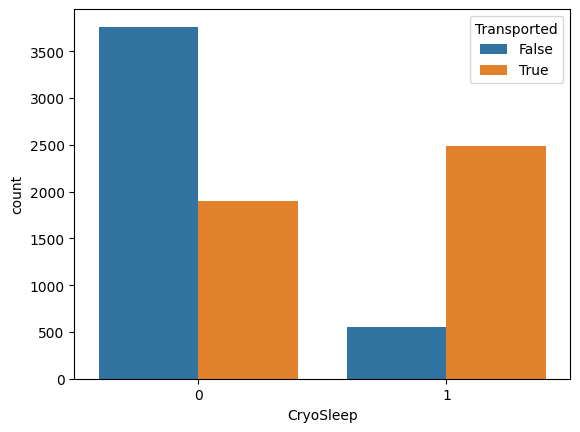

In [31]:
# CryoSleep
sns.countplot(x=train_df.CryoSleep,hue=target_df.Transported);

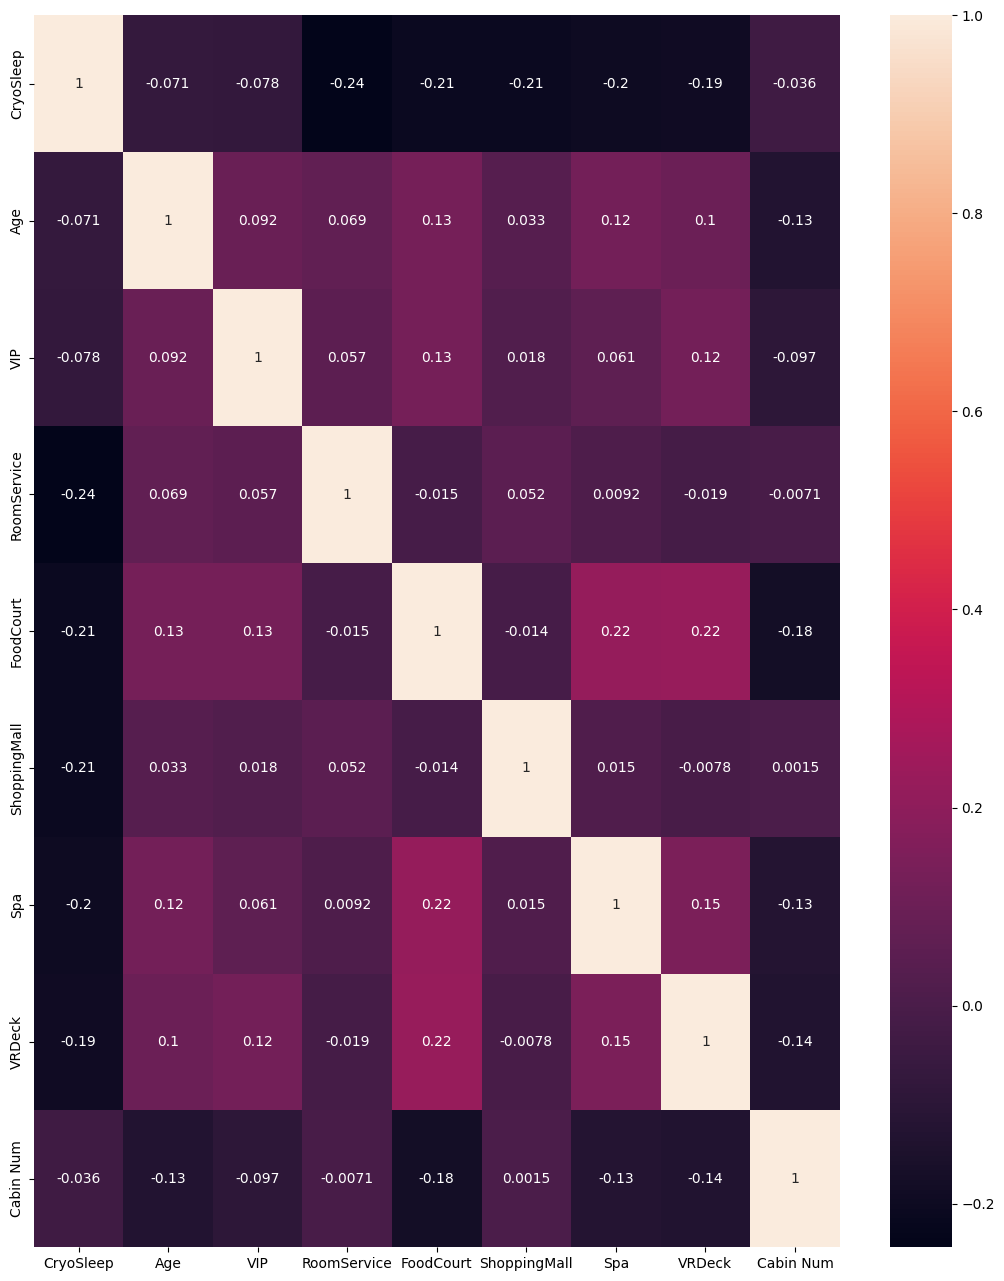

In [32]:
plt.figure(figsize=(13,16))
sns.heatmap(train_df.corr(numeric_only=True), annot=True);

In [33]:
fig = px.imshow(train_df.corr(numeric_only=True), text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

In [34]:
train_age = train_df.copy()

train_age["type"] = "Train"


ageDf = pd.concat([train_age])
fig = px.histogram(data_frame = ageDf,
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()


<Axes: xlabel='Age', ylabel='Count'>

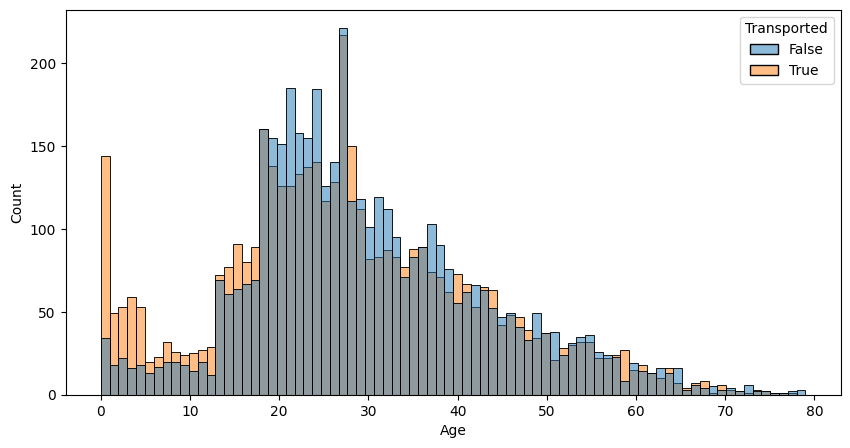

In [35]:
# Age
plt.figure(figsize=(10,5))
sns.histplot(data = target_df, x = train_df['Age'], hue = target_df.Transported, bins= 80)

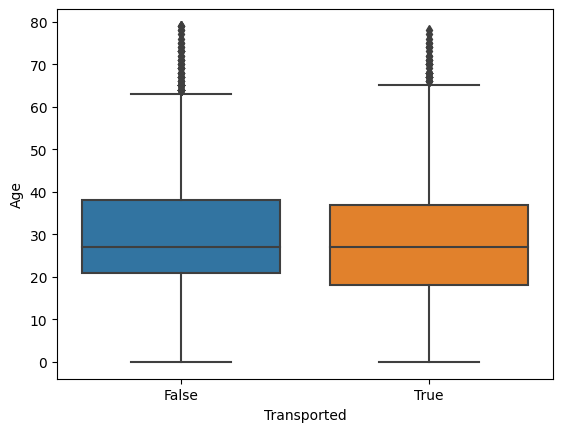

In [36]:
sns.boxplot(y=train_df.Age,x=target_df.Transported);

In [37]:
# deck x trans

# sns.countplot(data=train_df.sort_values('Cabin deck'), x="Cabin deck", hue="Transported")
# Num x trans 

# sns.histplot(data=train_df, x='Cabin Num', hue='Transported', binwidth=10)
# Num x trnas2

# sns.histplot(data=train_df, x='Cabin Num', hue='Transported', binwidth=300)
# Cabin Num -> Cabin area 1~300 / 3~600 / .....
# train_df['Cabin Area'] = train_df['Cabin Num'].floordiv(300).add(1)
# Side x trans

# sns.countplot(data=train_df, x="Cabin Side", hue="Transported")

# group_size

# sns.countplot(data=train_df, x="group size")
# group_size x trans

# sns.countplot(data=train_df, x="group size", hue="Transported")

### Data Preparing

* 학습을 위한 one-hot-encoding
- 범주형 데이터를 true/false로 나타내기

In [38]:
train_df

HomePlanet  CryoSleep    Destination   Age  VIP  RoomService  FoodCourt   
0        Europa          0    TRAPPIST-1e 39.00    0         0.00       0.00  \
1         Earth          0    TRAPPIST-1e 24.00    0       109.00       9.00   
2        Europa          0    TRAPPIST-1e 58.00    1        43.00    3576.00   
3        Europa          0    TRAPPIST-1e 33.00    0         0.00    1283.00   
4         Earth          0    TRAPPIST-1e 16.00    0       303.00      70.00   
...         ...        ...            ...   ...  ...          ...        ...   
8688     Europa          0    55 Cancri e 41.00    1         0.00    6819.00   
8689      Earth          1  PSO J318.5-22 18.00    0         0.00       0.00   
8690      Earth          0    TRAPPIST-1e 26.00    0         0.00       0.00   
8691     Europa          0    55 Cancri e 32.00    0         0.00    1049.00   
8692     Europa          0    TRAPPIST-1e 44.00    0       126.00    4688.00   

      ShoppingMall     Spa  VRDeck Cabin Deck  Cabin Num Cabin Side  
0             0.00    0.00    0.00          B       0.00          P  
1            25.00  549.00   44.00          F       0.00          S  
2             0.00 6715.00   49.00          A       0.00          S  
3           371.00 3329.00  193.00          A       0.00          S  
4           151.00  565.00    2.00          F       1.00          S  
...            ...     ...     ...        ...        ...        ...  
8688          0.00 1643.00   74.00          A      98.00          P  
8689          0.00    0.00    0.00          G    1499.00          S  
8690       1872.00    1.00    0.00          G    1500.00          S  
8691          0.00  353.00 3235.00          E     608.00          S  
8692          0.00    0.00   12.00          E     608.00          S  

[8693 rows x 13 columns]

In [39]:
encoding_train_df = pd.get_dummies(train_df)
encoding_train_df

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa   
0             0 39.00    0         0.00       0.00          0.00    0.00  \
1             0 24.00    0       109.00       9.00         25.00  549.00   
2             0 58.00    1        43.00    3576.00          0.00 6715.00   
3             0 33.00    0         0.00    1283.00        371.00 3329.00   
4             0 16.00    0       303.00      70.00        151.00  565.00   
...         ...   ...  ...          ...        ...           ...     ...   
8688          0 41.00    1         0.00    6819.00          0.00 1643.00   
8689          1 18.00    0         0.00       0.00          0.00    0.00   
8690          0 26.00    0         0.00       0.00       1872.00    1.00   
8691          0 32.00    0         0.00    1049.00          0.00  353.00   
8692          0 44.00    0       126.00    4688.00          0.00    0.00   

      VRDeck  Cabin Num  HomePlanet_Earth  ...  Cabin Deck_A  Cabin Deck_B   
0       0.00       0.00             False  ...         False          True  \
1      44.00       0.00              True  ...         False         False   
2      49.00       0.00             False  ...          True         False   
3     193.00       0.00             False  ...          True         False   
4       2.00       1.00              True  ...         False         False   
...      ...        ...               ...  ...           ...           ...   
8688   74.00      98.00             False  ...          True         False   
8689    0.00    1499.00              True  ...         False         False   
8690    0.00    1500.00              True  ...         False         False   
8691 3235.00     608.00             False  ...         False         False   
8692   12.00     608.00             False  ...         False         False   

      Cabin Deck_C  Cabin Deck_D  Cabin Deck_E  Cabin Deck_F  Cabin Deck_G   
0            False         False         False         False         False  \
1            False         False         False          True         False   
2            False         False         False         False         False   
3            False         False         False         False         False   
4            False         False         False          True         False   
...            ...           ...           ...           ...           ...   
8688         False         False         False         False         False   
8689         False         False         False         False          True   
8690         False         False         False         False          True   
8691         False         False          True         False         False   
8692         False         False          True         False         False   

      Cabin Deck_T  Cabin Side_P  Cabin Side_S  
0            False          True         False  
1            False         False          True  
2            False         False          True  
3            False         False          True  
4            False         False          True  
...            ...           ...           ...  
8688         False          True         False  
8689         False         False          True  
8690         False         False          True  
8691         False         False          True  
8692         False         False          True  

[8693 rows x 25 columns]

In [40]:
encoding_train_df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin Num', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin Deck_A',
       'Cabin Deck_B', 'Cabin Deck_C', 'Cabin Deck_D', 'Cabin Deck_E',
       'Cabin Deck_F', 'Cabin Deck_G', 'Cabin Deck_T', 'Cabin Side_P',
       'Cabin Side_S'],
      dtype='object')

### 추가 데이터를 확인해보겠습니다.

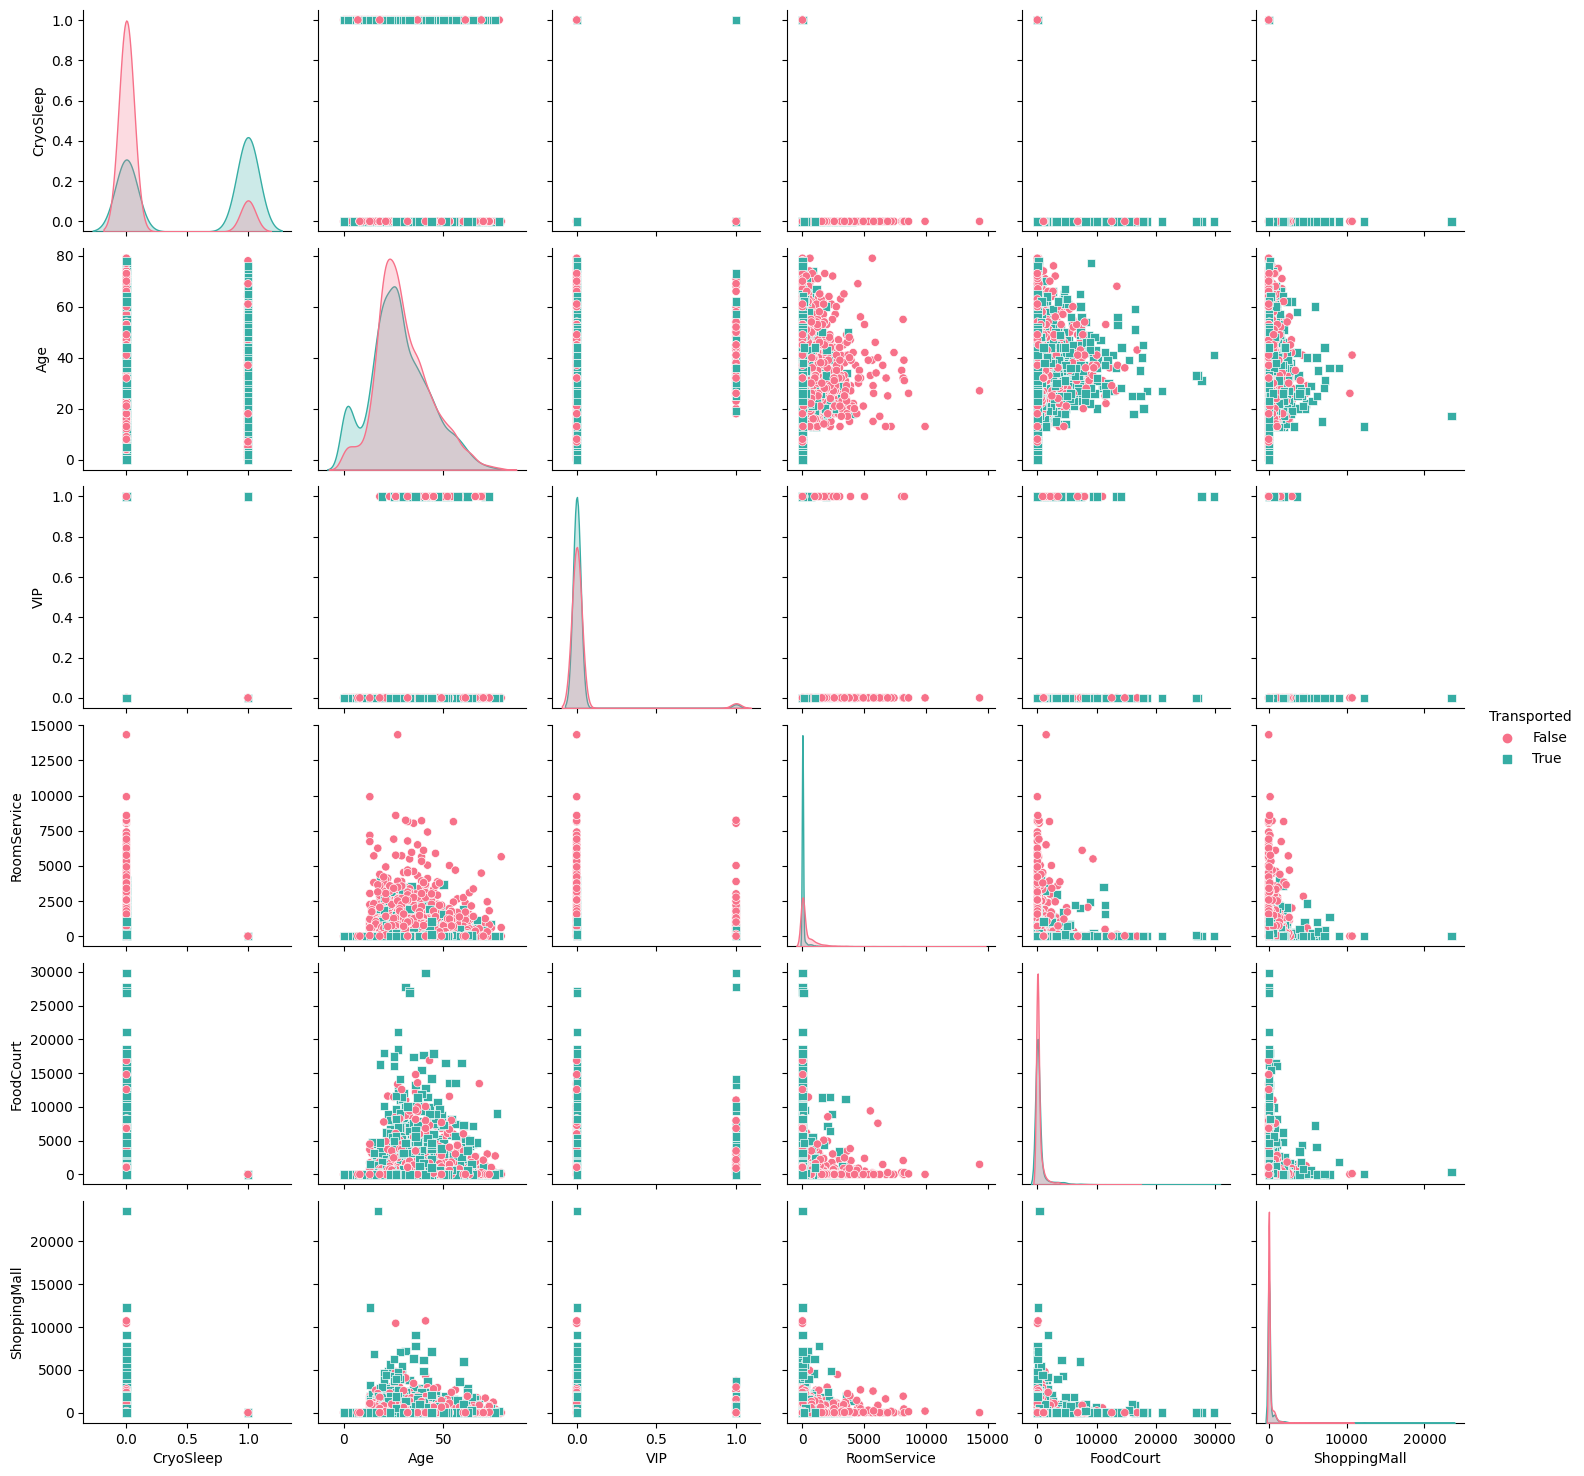

In [41]:
analysis = pd.merge(encoding_train_df,target_df['Transported'], left_index = True, right_index=True)
sns.pairplot(analysis[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

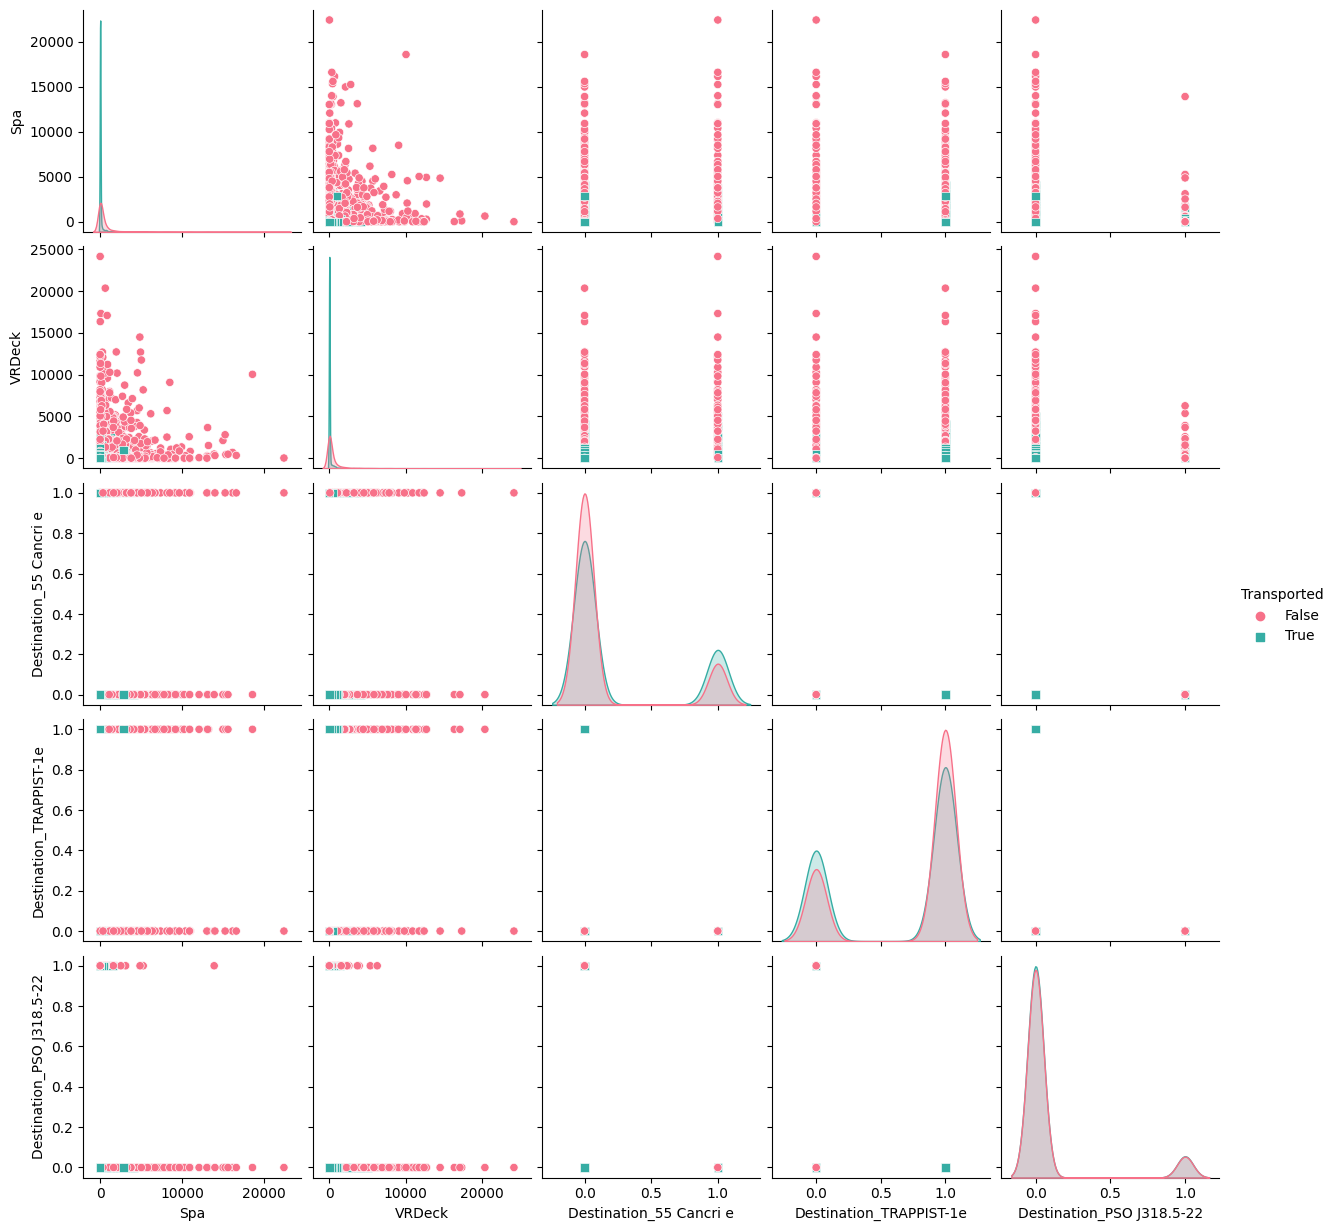

In [42]:
sns.pairplot(analysis[['Spa', 'VRDeck', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

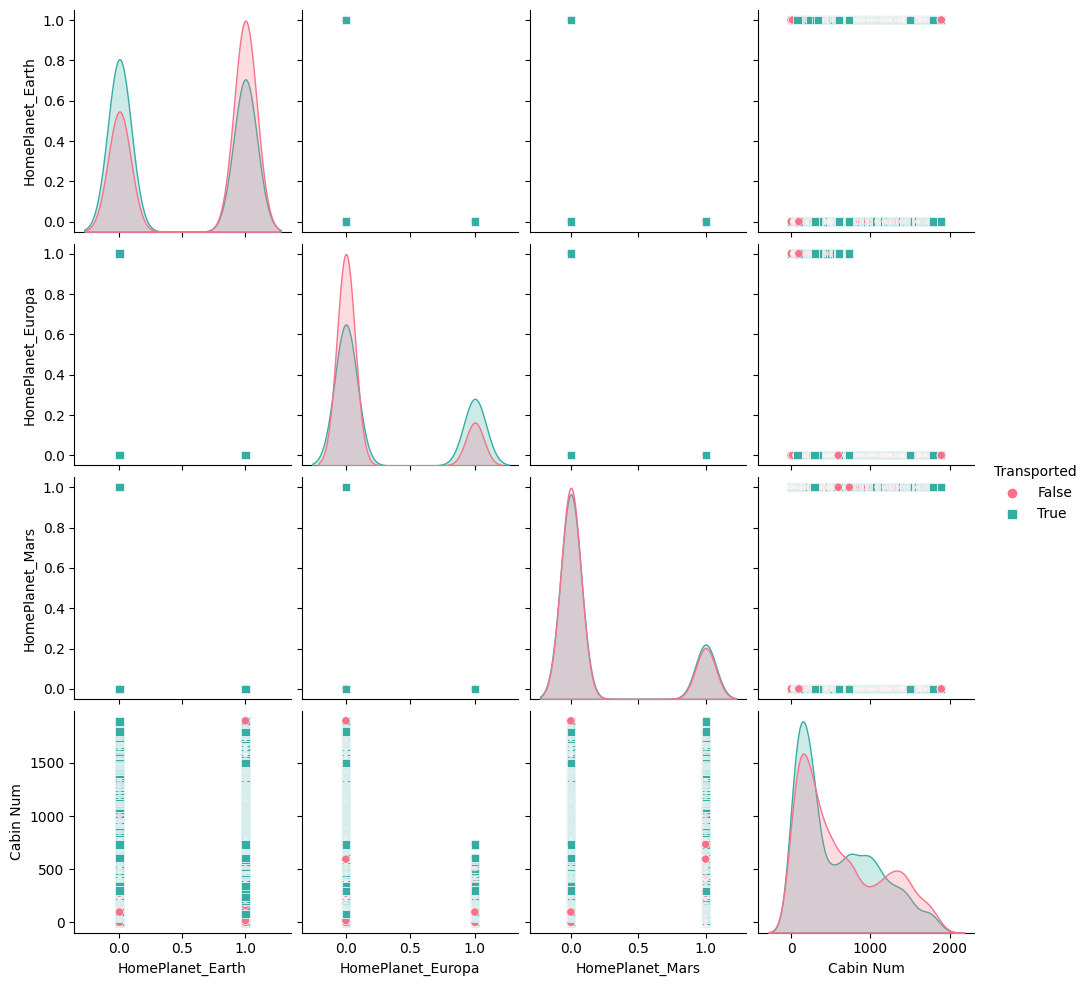

In [43]:
sns.pairplot(analysis[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cabin Num', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

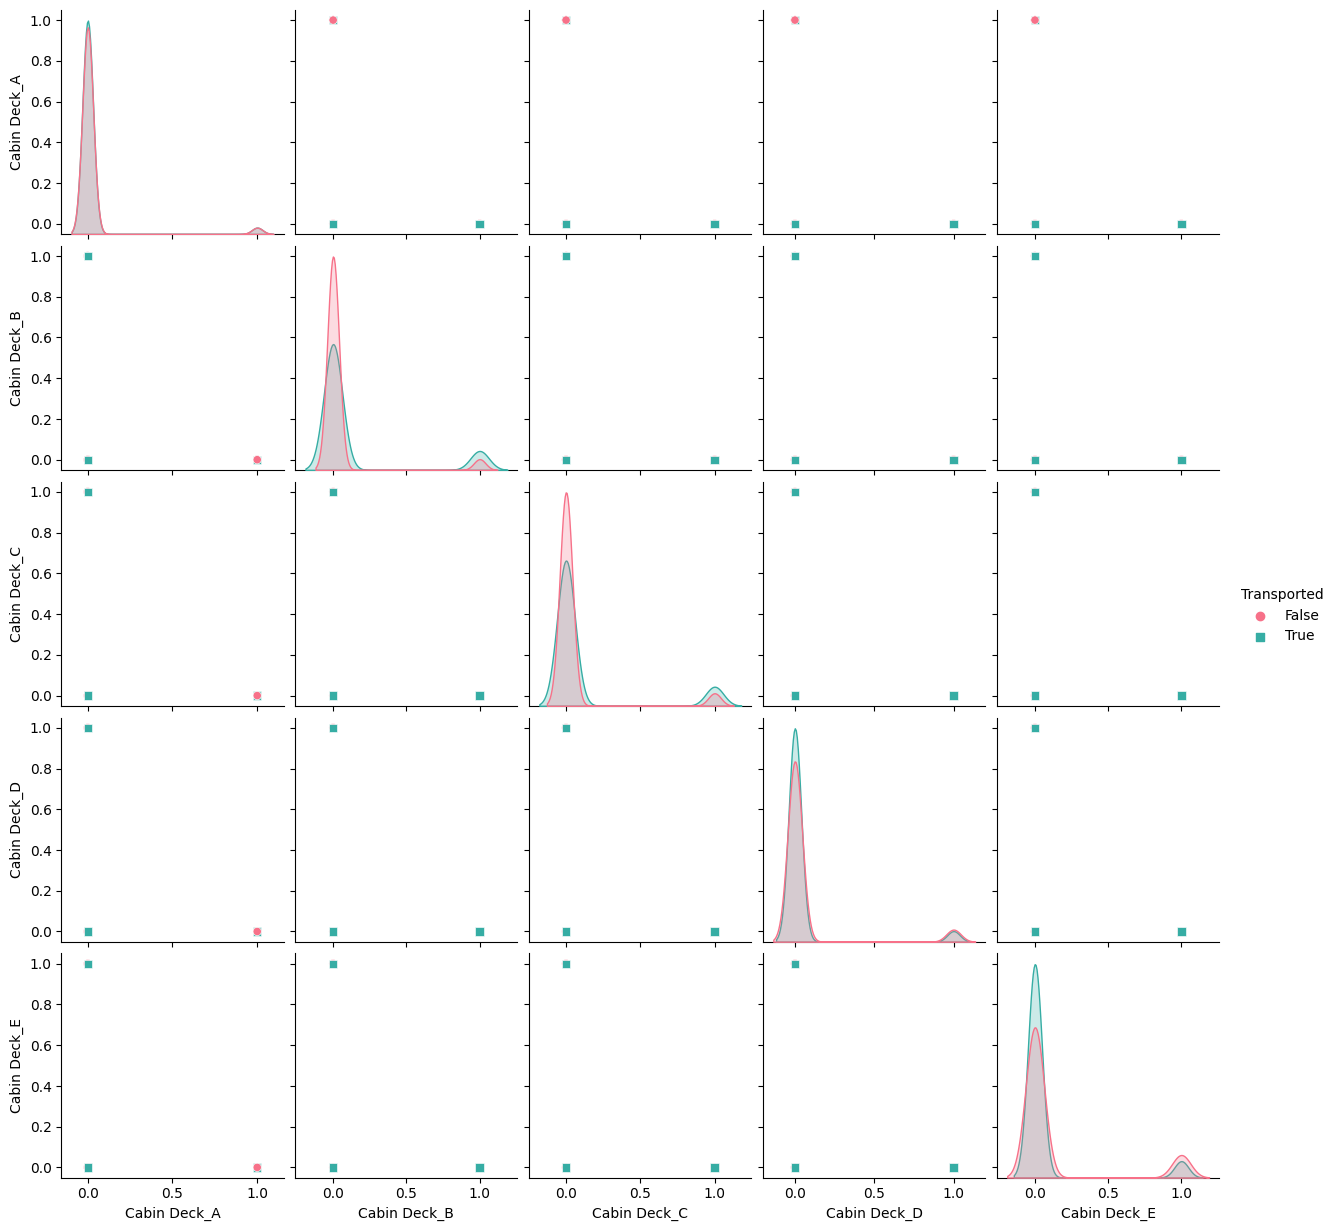

In [44]:
sns.pairplot(analysis[['Cabin Deck_A','Cabin Deck_B', 'Cabin Deck_C', 'Cabin Deck_D', 'Cabin Deck_E', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

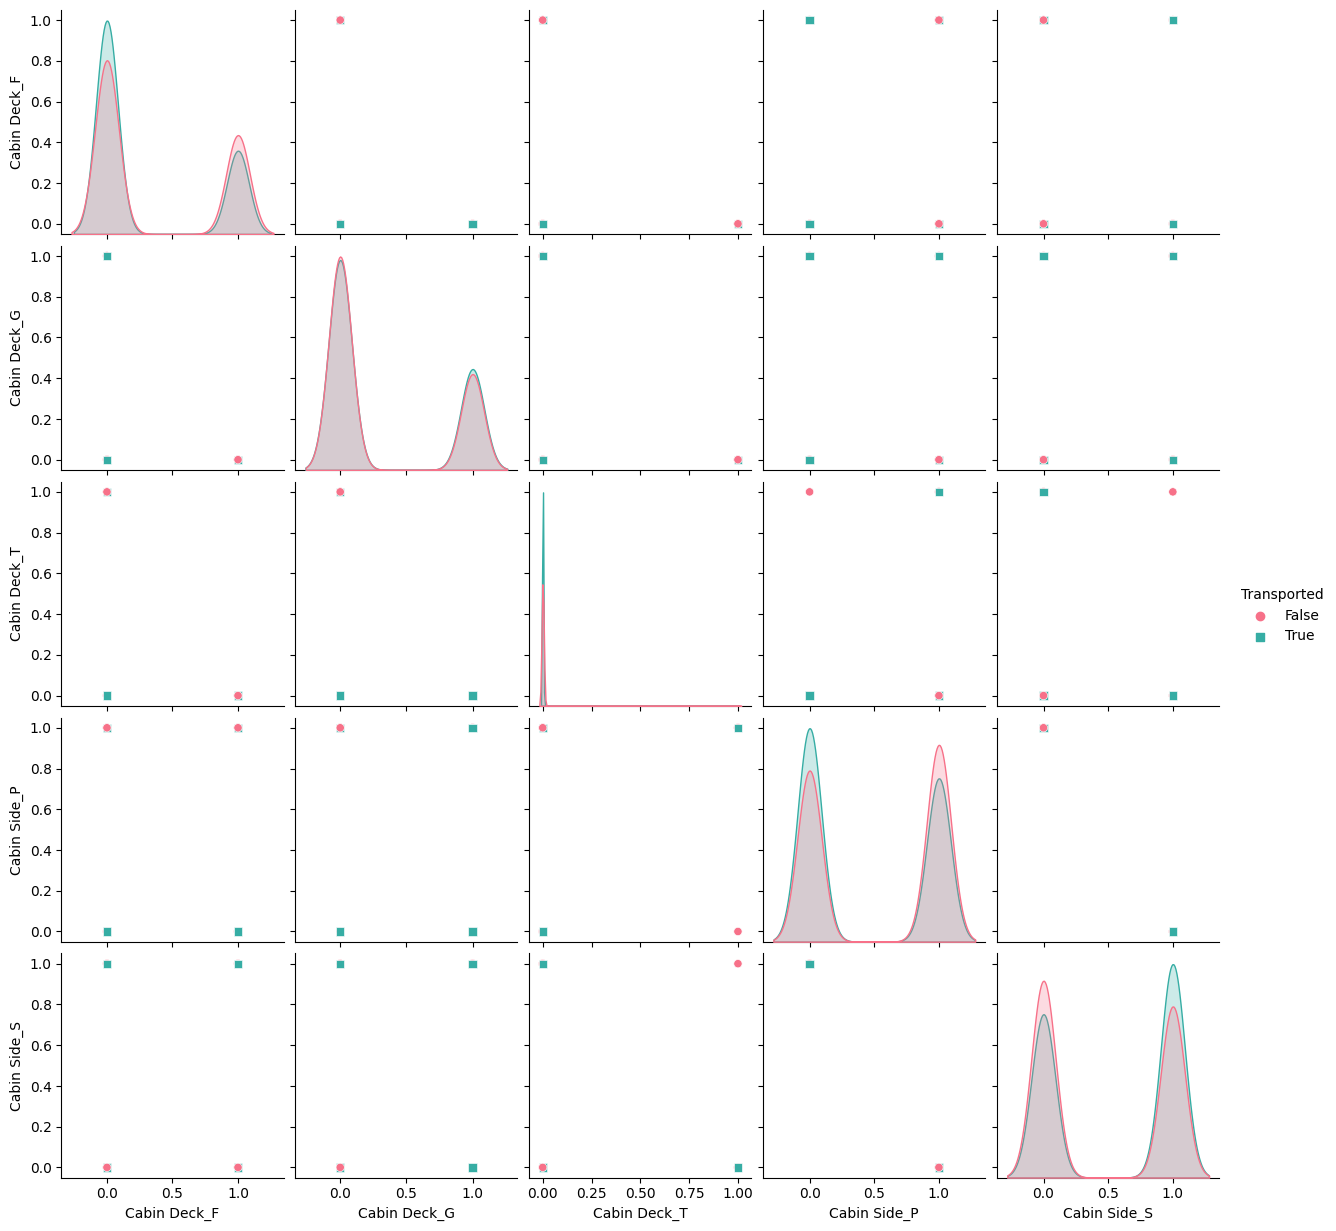

In [45]:
sns.pairplot(analysis[['Cabin Deck_F', 'Cabin Deck_G', 'Cabin Deck_T', 'Cabin Side_P', 'Cabin Side_S', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

- 그래프를 통해 Transported와의 관계를 알아보았지만, 다른 feature들과의 관계를 한번 더알아보았습니다.
- 각 feature과의 관계는 pairplot을 통해 알아보았습니다.
- 거의 동일한 형태의 feature들은 drop을 한 뒤 model을 적용할 예정입니다.

In [46]:
train_df = encoding_train_df.drop(['Cabin Deck_A', 'Cabin Deck_G', 'Cabin Deck_T', 'Cabin Deck_D', 'Cabin Deck_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)

pca = PCA(n_components = 10)
pca.fit(encoding_train_df)
pca_train_df = pca.transform(encoding_train_df)
pca_train_df

pca_cols = []
for i in range(0, 10) :
    x = 'pca_col' + str(i)
    pca_cols.append(x)
pca_cols
pca_df = pd.DataFrame(pca_train_df, columns = pca_cols)
pca_df

pca_col0  pca_col1  pca_col2  pca_col3  pca_col4  pca_col5  pca_col6   
0      -535.34   -188.71    -27.40   -245.54   -117.24   -653.55      9.88  \
1      -364.46    174.66    351.46   -144.06   -124.74   -625.82     -5.91   
2      4601.93   2538.93   4854.95   -308.60   -180.21   -199.07     19.22   
3      1609.04   1476.55   2291.40   -211.10    214.34   -444.47     -0.91   
4      -318.08    132.97    397.17     73.59    -48.13   -620.14    -14.32   
...        ...       ...       ...       ...       ...       ...       ...   
8688   6177.76  -1848.04   1045.85   -222.93    -92.46   -162.51      5.45   
8689   -638.38   -249.96    -24.09   -272.00   -105.95    840.42     -7.05   
8690   -646.57   -232.94      6.04    170.50   1712.65    835.56     -0.40   
8691   1397.58   1789.26  -1956.46   -201.68   -103.01    175.84      1.04   
8692   3720.00  -2070.35    -94.00    -95.07   -113.41    175.59     12.94   

      pca_col7  pca_col8  pca_col9  
0        -0.80     -0.33     -0.02  
1         0.53     -0.17     -0.96  
2         0.58     -0.08     -0.56  
3         0.61     -0.34     -0.34  
4         0.54     -0.17     -0.93  
...        ...       ...       ...  
8688     -0.78      0.10      0.71  
8689      0.88      0.70      0.75  
8690      0.88      0.70     -0.14  
8691      0.72     -0.34      0.87  
8692      0.59     -0.39     -0.34  

[8693 rows x 10 columns]

- 이전 단계에서 유사한 feature를 drop을 하였지만, 대다수 유사한 형태의 feature가 있었기 때문에 pca를 통해 feature를 줄이고 overfitting을 방지하기 위해 pca를 이용하여 차원을 10차원으로 줄였습니다.
- feature를 5개~15개로 확인해본 결과 10개가 적당하다는 결론이 나와서 10개로 pca를 진행하였습니다.

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(pca_df, target_df, test_size = 0.3, random_state = 0)#x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

In [48]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6954, 10) (1739, 10) (6954, 1) (1739, 1)


<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

In [49]:
# LazyClassifier 라이브러리를 이용한 효율좋은 모델 찾기
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=0,
                     classifiers='all')

models, predictions = clf.fit(x_train , x_test , y_train , y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.37it/s]


In [50]:
models[:15]

Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                    
LGBMClassifier              0.80               0.80     0.80      0.80  \
RandomForestClassifier      0.80               0.80     0.80      0.80   
XGBClassifier               0.80               0.80     0.80      0.80   
ExtraTreesClassifier        0.79               0.79     0.79      0.79   
BaggingClassifier           0.79               0.79     0.79      0.79   
SVC                         0.78               0.78     0.78      0.78   
KNeighborsClassifier        0.78               0.78     0.78      0.78   
NuSVC                       0.78               0.78     0.78      0.78   
AdaBoostClassifier          0.77               0.77     0.77      0.77   
LinearSVC                   0.77               0.77     0.77      0.77   
CalibratedClassifierCV      0.76               0.76     0.76      0.76   
LogisticRegression          0.76               0.76     0.76      0.76   
SGDClassifier               0.76               0.76     0.76      0.76   
BernoulliNB                 0.76               0.76     0.76      0.76   
LabelSpreading              0.76               0.75     0.75      0.75   

                        Time Taken  
Model                               
LGBMClassifier                0.46  
RandomForestClassifier        3.19  
XGBClassifier                 1.18  
ExtraTreesClassifier          1.01  
BaggingClassifier             0.99  
SVC                           2.24  
KNeighborsClassifier          0.19  
NuSVC                         2.73  
AdaBoostClassifier            0.91  
LinearSVC                     0.35  
CalibratedClassifierCV        1.38  
LogisticRegression            0.07  
SGDClassifier                 0.07  
BernoulliNB                   0.04  
LabelSpreading                3.67

#### Accuracy 값이 높은LGBMClassifier,  RandomForestClassifier,  XGBClassifier, LogisticRegression(복습차원)를 각자 모델을 만들어서 실습해보겠습니다.

In [51]:
# LGBMClassifier 객체 생성
lgbm_clf = LGBMClassifier(n_estimators=500)

In [57]:
# RandomForestClassifier 객체 생성
rf_clf = RandomForestClassifier(n_estimators = 200, random_state=0, max_depth = 16, min_samples_leaf = 8, min_samples_split = 4, oob_score=True)

In [53]:
# XGBClassifier객체 생성
xgb_clf = XGBClassifier(n_estimators=100, random_state=0)
    # n_estimators 디폴트 100 (생성할 나무갯수)
    # max_features 선택할 특성의 수

In [54]:
# LogisticRegression 객체 생성
log = linear_model.LogisticRegression()

<br>

## 4. Train the model

In [55]:
# 검증 데이터 지정
evals = [(x_test, y_test)]

# lightgbm 학습
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

[1]	valid_0's auc: 0.871833	valid_0's binary_logloss: 0.65122
[2]	valid_0's auc: 0.877424	valid_0's binary_logloss: 0.616912
[3]	valid_0's auc: 0.881198	valid_0's binary_logloss: 0.588301
[4]	valid_0's auc: 0.884599	valid_0's binary_logloss: 0.564058
[5]	valid_0's auc: 0.887872	valid_0's binary_logloss: 0.543134
[6]	valid_0's auc: 0.888838	valid_0's binary_logloss: 0.525239
[7]	valid_0's auc: 0.889863	valid_0's binary_logloss: 0.509845
[8]	valid_0's auc: 0.889811	valid_0's binary_logloss: 0.497053
[9]	valid_0's auc: 0.890952	valid_0's binary_logloss: 0.484951
[10]	valid_0's auc: 0.891491	valid_0's binary_logloss: 0.47481
[11]	valid_0's auc: 0.89188	valid_0's binary_logloss: 0.465861
[12]	valid_0's auc: 0.892093	valid_0's binary_logloss: 0.458196
[13]	valid_0's auc: 0.891981	valid_0's binary_logloss: 0.451762
[14]	valid_0's auc: 0.892738	valid_0's binary_logloss: 0.445358
[15]	valid_0's auc: 0.892438	valid_0's binary_logloss: 0.440694
[16]	valid_0's auc: 0.891732	valid_0's binary_loglos

LGBMClassifier(n_estimators=500)

In [58]:
# randomforest 학습
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=200, oob_score=True, random_state=0)

In [59]:
 # xgboost 학습
 # early_stoping : 모니터링되는 측정항목의 개선이 중지되면 학습을 중지
        # 최고치에서 30회까지 개선이 없으면 중지
        # 왼쪽은 학습, 우측은 검증 (검증값이 가장 높은 건 15번째 + 30 더하고 멈춤)
xgb_clf.fit(x_train, y_train, early_stopping_rounds=30,
            eval_metric="auc", eval_set=[(x_train, y_train), (x_test, y_test)])
      # 원래 검증 셋은 test 말고 다른 데이터 셋으로 해야하지만 여기선 그냥 test 셋으로 진행함

[0]	validation_0-auc:0.88537	validation_1-auc:0.86200
[1]	validation_0-auc:0.89798	validation_1-auc:0.87077
[2]	validation_0-auc:0.90675	validation_1-auc:0.87556
[3]	validation_0-auc:0.91046	validation_1-auc:0.87969
[4]	validation_0-auc:0.91347	validation_1-auc:0.88275
[5]	validation_0-auc:0.91681	validation_1-auc:0.88517
[6]	validation_0-auc:0.91920	validation_1-auc:0.88581
[7]	validation_0-auc:0.92075	validation_1-auc:0.88653
[8]	validation_0-auc:0.92194	validation_1-auc:0.88672
[9]	validation_0-auc:0.92811	validation_1-auc:0.88832
[10]	validation_0-auc:0.93142	validation_1-auc:0.88942
[11]	validation_0-auc:0.93308	validation_1-auc:0.88989
[12]	validation_0-auc:0.93437	validation_1-auc:0.89045
[13]	validation_0-auc:0.93550	validation_1-auc:0.89009
[14]	validation_0-auc:0.93715	validation_1-auc:0.89115
[15]	validation_0-auc:0.93862	validation_1-auc:0.89227
[16]	validation_0-auc:0.93932	validation_1-auc:0.89259
[17]	validation_0-auc:0.94154	validation_1-auc:0.89230
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [60]:
# LogisticRegression 학습
log.fit(x_train, y_train)

LogisticRegression()

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

### RandomForestClassifier

In [61]:
# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(rf_clf.predict(x_test), y_test))

# 분류 성능 확인
    # y_test 값과 xgb_clf 예측값을 비교,
log_roc_score = roc_auc_score(y_test, rf_clf.predict_proba(x_test)[:,1], average='macro')
    # 평균의 종류 - 매크로(점수), 마이크로(점수x데이터수)
print(f'ROC AUC: {log_roc_score:.4f}')

Accuracy:  0.8021851638872916
ROC AUC: 0.8924


In [62]:
pred_test = rf_clf.predict_proba(x_test)

In [63]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

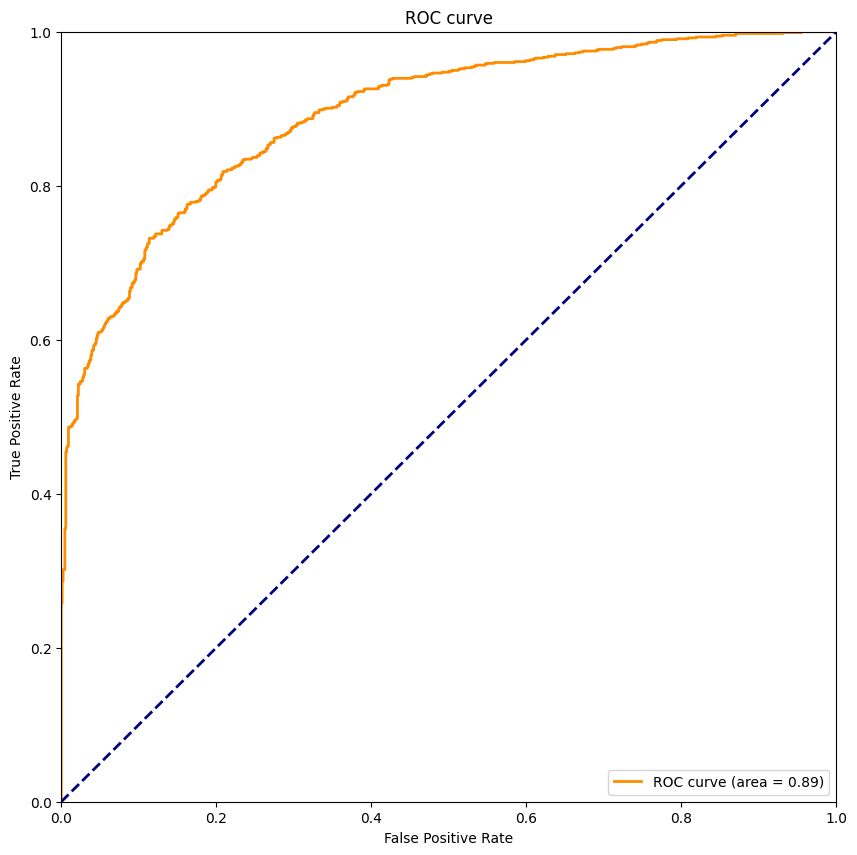

In [64]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

### LogisticRegression

In [65]:
# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(log.predict(x_test), y_test))

# 분류 성능 확인
    # y_test 값과 xgb_clf 예측값을 비교,
log_roc_score = roc_auc_score(y_test, log.predict_proba(x_test)[:,1], average='macro')
    # 평균의 종류 - 매크로(점수), 마이크로(점수x데이터수)
print(f'ROC AUC: {log_roc_score:.4f}')

Accuracy:  0.7659574468085106
ROC AUC: 0.8620


In [66]:
pred_test = log.predict_proba(x_test)

In [67]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

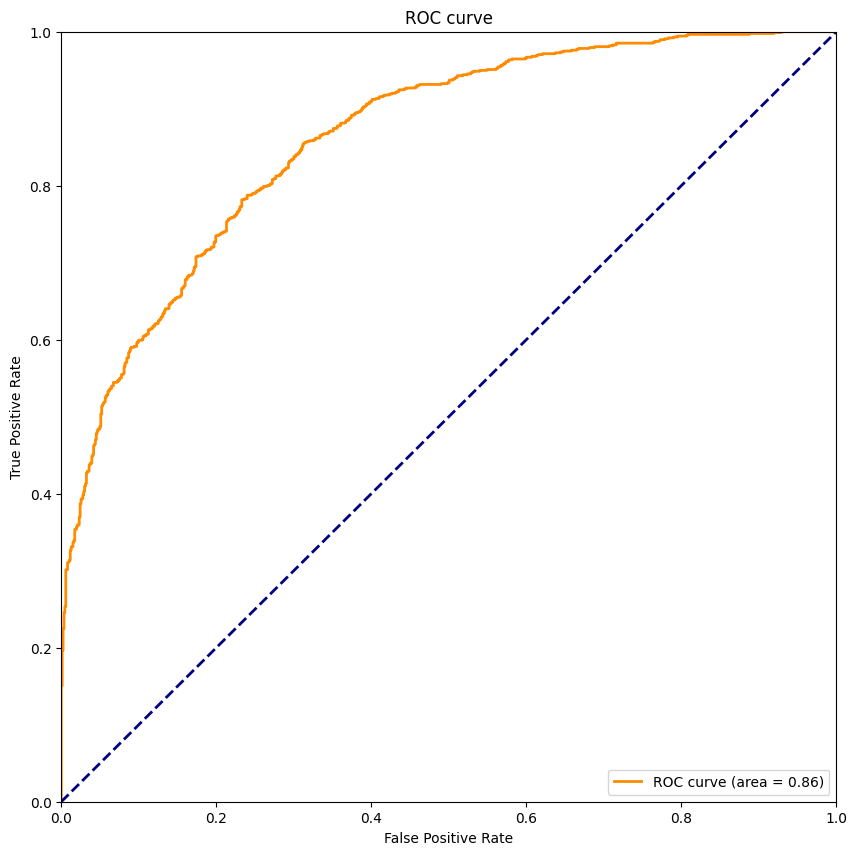

In [68]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

### xgboost

In [69]:
# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(xgb_clf.predict(x_test), y_test))

# 분류 성능 확인
    # y_test 값과 xgb_clf 예측값을 비교,
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1], average='macro')
    # 평균의 종류 - 매크로(점수), 마이크로(점수x데이터수)
print(f'ROC AUC: {xgb_roc_score:.4f}')

Accuracy:  0.8102357676825762
ROC AUC: 0.8953


In [70]:
### 3. GridSearchCV 적용
# GridSearchCV란 머신러닝에서 모델의 성능향상을 위해 쓰이는 기법중 하나입니다.
# 사용자가 직접 모델의 하이퍼 파라미터의 값을 리스트로 입력하면 값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교하면서 최적의 하이퍼 파라미터 값을 찾는 과정을 진행합니다.
%time # 수행시간 표시
# 수행속도 향상을 위해 n_estimators를 50으로 감소
xgb_clf = XGBClassifier(n_estimators=50)

# colsample_bytree : 컬럼이 너무 많으니 조정해서 과적합을 조정하겠다.
# min_child_weight: 트리에서 추가로 가지치기 위한 필요 최소 샘플수
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# 하이퍼 파라미터 수행속도를 향상하기 위해 cv는 2 부여함
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=2)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc',eval_set=[(x_train, y_train), (x_test,y_test)])

CPU times: total: 0 ns
Wall time: 0 ns
[0]	validation_0-auc:0.82670	validation_1-auc:0.81757
[1]	validation_0-auc:0.84909	validation_1-auc:0.83447
[2]	validation_0-auc:0.86977	validation_1-auc:0.85923
[3]	validation_0-auc:0.87674	validation_1-auc:0.86527
[4]	validation_0-auc:0.88317	validation_1-auc:0.87070
[5]	validation_0-auc:0.88651	validation_1-auc:0.87117
[6]	validation_0-auc:0.89262	validation_1-auc:0.87630
[7]	validation_0-auc:0.89601	validation_1-auc:0.88002
[8]	validation_0-auc:0.89942	validation_1-auc:0.88177
[9]	validation_0-auc:0.90186	validation_1-auc:0.88155
[10]	validation_0-auc:0.90255	validation_1-auc:0.88143
[11]	validation_0-auc:0.90431	validation_1-auc:0.88317
[12]	validation_0-auc:0.90550	validation_1-auc:0.88324
[13]	validation_0-auc:0.90593	validation_1-auc:0.88305
[14]	validation_0-auc:0.90658	validation_1-auc:0.88308
[15]	validation_0-auc:0.90838	validation_1-auc:0.88313
[16]	validation_0-auc:0.90996	validation_1-auc:0.88367
[17]	validation_0-auc:0.91059	valida

[2]	validation_0-auc:0.87739	validation_1-auc:0.86074
[3]	validation_0-auc:0.88120	validation_1-auc:0.86744
[4]	validation_0-auc:0.88782	validation_1-auc:0.87327
[5]	validation_0-auc:0.89010	validation_1-auc:0.87381
[6]	validation_0-auc:0.89458	validation_1-auc:0.87731
[7]	validation_0-auc:0.89784	validation_1-auc:0.88103
[8]	validation_0-auc:0.90031	validation_1-auc:0.88394
[9]	validation_0-auc:0.90178	validation_1-auc:0.88406
[10]	validation_0-auc:0.90199	validation_1-auc:0.88450
[11]	validation_0-auc:0.90348	validation_1-auc:0.88520
[12]	validation_0-auc:0.90538	validation_1-auc:0.88683
[13]	validation_0-auc:0.90662	validation_1-auc:0.88714
[14]	validation_0-auc:0.90854	validation_1-auc:0.88856
[15]	validation_0-auc:0.90920	validation_1-auc:0.88904
[16]	validation_0-auc:0.91063	validation_1-auc:0.88869
[17]	validation_0-auc:0.91129	validation_1-auc:0.88987
[18]	validation_0-auc:0.91198	validation_1-auc:0.89016
[19]	validation_0-auc:0.91197	validation_1-auc:0.89037
[20]	validation_0-

[2]	validation_0-auc:0.89158	validation_1-auc:0.86424
[3]	validation_0-auc:0.89615	validation_1-auc:0.86811
[4]	validation_0-auc:0.90168	validation_1-auc:0.87017
[5]	validation_0-auc:0.90299	validation_1-auc:0.87100
[6]	validation_0-auc:0.90883	validation_1-auc:0.87509
[7]	validation_0-auc:0.91162	validation_1-auc:0.87713
[8]	validation_0-auc:0.91403	validation_1-auc:0.88069
[9]	validation_0-auc:0.91666	validation_1-auc:0.88210
[10]	validation_0-auc:0.91810	validation_1-auc:0.88293
[11]	validation_0-auc:0.91899	validation_1-auc:0.88349
[12]	validation_0-auc:0.91971	validation_1-auc:0.88479
[13]	validation_0-auc:0.92035	validation_1-auc:0.88481
[14]	validation_0-auc:0.92105	validation_1-auc:0.88563
[15]	validation_0-auc:0.92212	validation_1-auc:0.88657
[16]	validation_0-auc:0.92261	validation_1-auc:0.88614
[17]	validation_0-auc:0.92383	validation_1-auc:0.88753
[18]	validation_0-auc:0.92494	validation_1-auc:0.88790
[19]	validation_0-auc:0.92513	validation_1-auc:0.88786
[20]	validation_0-

[2]	validation_0-auc:0.87695	validation_1-auc:0.86383
[3]	validation_0-auc:0.88262	validation_1-auc:0.87187
[4]	validation_0-auc:0.88686	validation_1-auc:0.87374
[5]	validation_0-auc:0.88815	validation_1-auc:0.87316
[6]	validation_0-auc:0.89317	validation_1-auc:0.87618
[7]	validation_0-auc:0.89589	validation_1-auc:0.87843
[8]	validation_0-auc:0.89977	validation_1-auc:0.88147
[9]	validation_0-auc:0.90207	validation_1-auc:0.88389
[10]	validation_0-auc:0.90436	validation_1-auc:0.88328
[11]	validation_0-auc:0.90592	validation_1-auc:0.88314
[12]	validation_0-auc:0.90931	validation_1-auc:0.88510
[13]	validation_0-auc:0.91021	validation_1-auc:0.88428
[14]	validation_0-auc:0.91177	validation_1-auc:0.88535
[15]	validation_0-auc:0.91217	validation_1-auc:0.88548
[16]	validation_0-auc:0.91354	validation_1-auc:0.88576
[17]	validation_0-auc:0.91425	validation_1-auc:0.88620
[18]	validation_0-auc:0.91506	validation_1-auc:0.88741
[19]	validation_0-auc:0.91550	validation_1-auc:0.88717
[20]	validation_0-

[2]	validation_0-auc:0.89832	validation_1-auc:0.86726
[3]	validation_0-auc:0.90365	validation_1-auc:0.87327
[4]	validation_0-auc:0.90945	validation_1-auc:0.87434
[5]	validation_0-auc:0.91147	validation_1-auc:0.87698
[6]	validation_0-auc:0.91453	validation_1-auc:0.87810
[7]	validation_0-auc:0.91662	validation_1-auc:0.87831
[8]	validation_0-auc:0.91910	validation_1-auc:0.88099
[9]	validation_0-auc:0.92075	validation_1-auc:0.88314
[10]	validation_0-auc:0.92199	validation_1-auc:0.88195
[11]	validation_0-auc:0.92254	validation_1-auc:0.88264
[12]	validation_0-auc:0.92353	validation_1-auc:0.88272
[13]	validation_0-auc:0.92603	validation_1-auc:0.88220
[14]	validation_0-auc:0.92677	validation_1-auc:0.88210
[15]	validation_0-auc:0.92729	validation_1-auc:0.88201
[16]	validation_0-auc:0.92820	validation_1-auc:0.88197
[17]	validation_0-auc:0.92850	validation_1-auc:0.88254
[18]	validation_0-auc:0.92915	validation_1-auc:0.88189
[19]	validation_0-auc:0.92961	validation_1-auc:0.88250
[20]	validation_0-

[13]	validation_0-auc:0.92495	validation_1-auc:0.88760
[14]	validation_0-auc:0.92649	validation_1-auc:0.88846
[15]	validation_0-auc:0.92686	validation_1-auc:0.88809
[16]	validation_0-auc:0.92789	validation_1-auc:0.88963
[17]	validation_0-auc:0.92808	validation_1-auc:0.89033
[18]	validation_0-auc:0.92922	validation_1-auc:0.89056
[19]	validation_0-auc:0.92949	validation_1-auc:0.89053
[20]	validation_0-auc:0.93149	validation_1-auc:0.89196
[21]	validation_0-auc:0.93246	validation_1-auc:0.89106
[22]	validation_0-auc:0.93270	validation_1-auc:0.89147
[23]	validation_0-auc:0.93310	validation_1-auc:0.89132
[24]	validation_0-auc:0.93365	validation_1-auc:0.89160
[25]	validation_0-auc:0.93412	validation_1-auc:0.89145
[26]	validation_0-auc:0.93500	validation_1-auc:0.89148
[27]	validation_0-auc:0.93555	validation_1-auc:0.89160
[28]	validation_0-auc:0.93557	validation_1-auc:0.89144
[29]	validation_0-auc:0.93571	validation_1-auc:0.89146
[30]	validation_0-auc:0.93595	validation_1-auc:0.89078
[31]	valid

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [5, 7],
                         'min_child_weight': [1, 3]})

In [71]:
print('GridSearchCv 최적 파라미터:' , gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

GridSearchCv 최적 파라미터: {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 3}
ROC AUC: 0.8953


### xgboost 하이퍼파라미터 튜닝

In [72]:
%%time

# 새로운 하이퍼파라미터 적용된 XGBClassifier 객체 생성
xgb_clf = XGBClassifier(n_estimators=1000, random_state=0, learning_rate=0.02, max_depth=5,
                               min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)
    # colsample_bytree(1.0) : x트리(스탭)마다 사용할 칼럼(feature)의 비율
    # learning_rate(0.2) : 학습률은 낮을수록 모델이 견고해지고 오버피팅에 좋지만, Step 수를 줄이기 위해 올리기도함
    # min_child_weight(1): 트리에서 추가로 가지치는 최소 샘플수 (과적합 조절)
    # max_depth(6) : 너무 크면 과적합(통상 3~10 적용), 0 or ∞ 을 적용하면 제한없어짐
    # reg_lambda(1) : L2 Regularization(규제) 적용값, 피처개수가 많을 때 적용을 검토, 클수록 과적합 감소

# 학습
# eval_metric : 검증에 사용되는 함수 정의(통상 회귀'rmse', 분류'error'), 여기선 auc 스코어를 적용
xgb_clf.fit(x_train, y_train, early_stopping_rounds=200,
           eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

[0]	validation_0-auc:0.83211	validation_1-auc:0.81261
[1]	validation_0-auc:0.85318	validation_1-auc:0.83591
[2]	validation_0-auc:0.87394	validation_1-auc:0.85741
[3]	validation_0-auc:0.87618	validation_1-auc:0.85872
[4]	validation_0-auc:0.88186	validation_1-auc:0.86664
[5]	validation_0-auc:0.88245	validation_1-auc:0.86527
[6]	validation_0-auc:0.88319	validation_1-auc:0.86728
[7]	validation_0-auc:0.88597	validation_1-auc:0.86963
[8]	validation_0-auc:0.88615	validation_1-auc:0.87032
[9]	validation_0-auc:0.88714	validation_1-auc:0.86906
[10]	validation_0-auc:0.88793	validation_1-auc:0.86959
[11]	validation_0-auc:0.88902	validation_1-auc:0.87012
[12]	validation_0-auc:0.88994	validation_1-auc:0.87106
[13]	validation_0-auc:0.88969	validation_1-auc:0.87006
[14]	validation_0-auc:0.88951	validation_1-auc:0.86853
[15]	validation_0-auc:0.89060	validation_1-auc:0.87007
[16]	validation_0-auc:0.89075	validation_1-auc:0.86898
[17]	validation_0-auc:0.89140	validation_1-auc:0.87004
[18]	validation_0-au

[294]	validation_0-auc:0.92455	validation_1-auc:0.89138
[295]	validation_0-auc:0.92458	validation_1-auc:0.89142
[296]	validation_0-auc:0.92472	validation_1-auc:0.89144
[297]	validation_0-auc:0.92474	validation_1-auc:0.89148
[298]	validation_0-auc:0.92474	validation_1-auc:0.89146
[299]	validation_0-auc:0.92476	validation_1-auc:0.89148
[300]	validation_0-auc:0.92478	validation_1-auc:0.89151
[301]	validation_0-auc:0.92483	validation_1-auc:0.89151
[302]	validation_0-auc:0.92495	validation_1-auc:0.89155
[303]	validation_0-auc:0.92510	validation_1-auc:0.89154
[304]	validation_0-auc:0.92525	validation_1-auc:0.89167
[305]	validation_0-auc:0.92537	validation_1-auc:0.89174
[306]	validation_0-auc:0.92540	validation_1-auc:0.89174
[307]	validation_0-auc:0.92545	validation_1-auc:0.89173
[308]	validation_0-auc:0.92565	validation_1-auc:0.89181
[309]	validation_0-auc:0.92570	validation_1-auc:0.89181
[310]	validation_0-auc:0.92579	validation_1-auc:0.89183
[311]	validation_0-auc:0.92582	validation_1-auc:

[587]	validation_0-auc:0.94294	validation_1-auc:0.89593
[588]	validation_0-auc:0.94296	validation_1-auc:0.89593
[589]	validation_0-auc:0.94303	validation_1-auc:0.89596
[590]	validation_0-auc:0.94306	validation_1-auc:0.89595
[591]	validation_0-auc:0.94314	validation_1-auc:0.89594
[592]	validation_0-auc:0.94317	validation_1-auc:0.89594
[593]	validation_0-auc:0.94320	validation_1-auc:0.89593
[594]	validation_0-auc:0.94327	validation_1-auc:0.89593
[595]	validation_0-auc:0.94330	validation_1-auc:0.89593
[596]	validation_0-auc:0.94338	validation_1-auc:0.89599
[597]	validation_0-auc:0.94346	validation_1-auc:0.89601
[598]	validation_0-auc:0.94354	validation_1-auc:0.89601
[599]	validation_0-auc:0.94357	validation_1-auc:0.89601
[600]	validation_0-auc:0.94358	validation_1-auc:0.89602
[601]	validation_0-auc:0.94362	validation_1-auc:0.89602
[602]	validation_0-auc:0.94364	validation_1-auc:0.89605
[603]	validation_0-auc:0.94366	validation_1-auc:0.89604
[604]	validation_0-auc:0.94370	validation_1-auc:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [73]:
# 평가(roc auc)
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1],average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

ROC AUC: 0.8962


In [75]:
pred_test = xgb_clf.predict_proba(x_test)

In [76]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

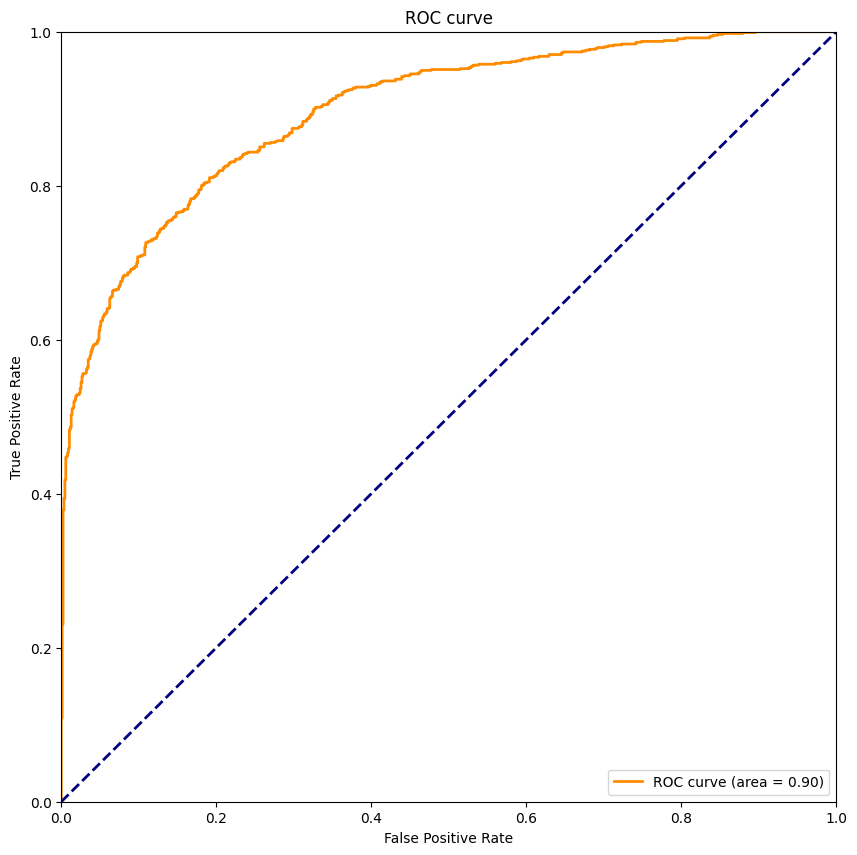

In [77]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

### lightgbm

In [78]:
# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(lgbm_clf.predict(x_test), y_test))

# 평가(roc auc)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1],average='macro')
    # predict_proba(X_test)[:,1] -> 두번째 컬럼(1이 될 활률 반환), ~[:,0] 첫번째 컬럼(0 확률 반환)

Accuracy:  0.80448533640023


In [79]:
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8979


In [80]:
%%time

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=100)

CPU times: total: 0 ns
Wall time: 0 ns


In [81]:
# 위 하이퍼 파라미터를 적용하고 n_estimators는 1000으로 증가, early_stopping_rounds는 100으로 증가
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(x_test, y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1],average='macro')

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.870278	valid_0's binary_logloss: 0.651878
[2]	valid_0's auc: 0.876872	valid_0's binary_logloss: 0.617982
[3]	valid_0's auc: 0.880122	valid_0's binary_logloss: 0.589327
[4]	valid_0's auc: 0.881271	valid_0's binary_logloss: 0.565417
[5]	valid_0's auc: 0.883562	valid_0's binary_logloss: 0.545788
[6]	valid_0's auc: 0.884509	valid_0's binary_logloss: 0.528348
[7]	valid_0's auc: 0.887386	valid_0's binary_logloss: 0.512212
[8]	valid_0's auc: 0.887531	valid_0's binary_logloss: 0.499375
[9]	valid_0's auc: 0.888053	valid_0's binary_logloss: 0.487635
[10]	valid_0's auc: 0.890219	valid_0's binary_logloss: 0.477089
[11]	valid_0's auc: 0.890141	valid_0's binary_logloss: 0.46864
[12]	valid_0's auc: 0.890744	valid_0's binary_logloss: 0.460651
[13]	valid_0's auc: 0.89098	valid_0's binary_logloss: 0.453567
[14]	valid_0's auc: 0.891496	valid_0's binary_logloss: 0.447309
[15]	valid_0's auc: 0.8915	valid_0's binary_logloss: 0.443115
[1

In [82]:
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8991


In [83]:
params = {'num_leaves': [32, 64],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트 수행속도 향상을 위해 cv 지정하지 않음
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(x_train, y_train), (x_test, y_test)])

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.88023	valid_0's binary_logloss: 0.650583	valid_1's auc: 0.870166	valid_1's binary_logloss: 0.652229
[2]	valid_0's auc: 0.887184	valid_0's binary_logloss: 0.615871	valid_1's auc: 0.874707	valid_1's binary_logloss: 0.619368
[3]	valid_0's auc: 0.891605	valid_0's binary_logloss: 0.585723	valid_1's auc: 0.880179	valid_1's binary_logloss: 0.590608
[4]	valid_0's auc: 0.893769	valid_0's binary_logloss: 0.560857	valid_1's auc: 0.881913	valid_1's binary_logloss: 0.566903
[5]	valid_0's auc: 0.89608	valid_0's binary_logloss: 0.53914	valid_1's auc: 0.883412	valid_1's binary_logloss: 0.546942
[6]	valid_0's auc: 0.898925	valid_0's binary_logloss: 0.519717	valid_1's auc: 0.88605	valid_1's binary_logloss: 0.52867
[7]	valid_0's auc: 0.90048	valid_0's binary_logloss: 0.503332	valid_1's auc: 0.886027	valid_1's binary_logloss: 0.514205
[8]	valid_0's auc: 0.901728	valid_0's binary_logloss: 0.488462	valid_1's auc: 0.887173	valid_1's bina

[72]	valid_0's auc: 0.947245	valid_0's binary_logloss: 0.305457	valid_1's auc: 0.898627	valid_1's binary_logloss: 0.395019
[73]	valid_0's auc: 0.947726	valid_0's binary_logloss: 0.304338	valid_1's auc: 0.898805	valid_1's binary_logloss: 0.394841
[74]	valid_0's auc: 0.948064	valid_0's binary_logloss: 0.303546	valid_1's auc: 0.898471	valid_1's binary_logloss: 0.395483
[75]	valid_0's auc: 0.948531	valid_0's binary_logloss: 0.30258	valid_1's auc: 0.898555	valid_1's binary_logloss: 0.395577
[76]	valid_0's auc: 0.949015	valid_0's binary_logloss: 0.301451	valid_1's auc: 0.898588	valid_1's binary_logloss: 0.395627
[77]	valid_0's auc: 0.949393	valid_0's binary_logloss: 0.300618	valid_1's auc: 0.898491	valid_1's binary_logloss: 0.395613
[78]	valid_0's auc: 0.949811	valid_0's binary_logloss: 0.29961	valid_1's auc: 0.8985	valid_1's binary_logloss: 0.395843
[79]	valid_0's auc: 0.950061	valid_0's binary_logloss: 0.298941	valid_1's auc: 0.898234	valid_1's binary_logloss: 0.396065
[80]	valid_0's auc: 

[11]	valid_0's auc: 0.903063	valid_0's binary_logloss: 0.453897	valid_1's auc: 0.886367	valid_1's binary_logloss: 0.469855
[12]	valid_0's auc: 0.904462	valid_0's binary_logloss: 0.444617	valid_1's auc: 0.887627	valid_1's binary_logloss: 0.461434
[13]	valid_0's auc: 0.905837	valid_0's binary_logloss: 0.436586	valid_1's auc: 0.88824	valid_1's binary_logloss: 0.454949
[14]	valid_0's auc: 0.907113	valid_0's binary_logloss: 0.429392	valid_1's auc: 0.888668	valid_1's binary_logloss: 0.449459
[15]	valid_0's auc: 0.907778	valid_0's binary_logloss: 0.423058	valid_1's auc: 0.888139	valid_1's binary_logloss: 0.444872
[16]	valid_0's auc: 0.908621	valid_0's binary_logloss: 0.417079	valid_1's auc: 0.88823	valid_1's binary_logloss: 0.440422
[17]	valid_0's auc: 0.90907	valid_0's binary_logloss: 0.411991	valid_1's auc: 0.8885	valid_1's binary_logloss: 0.436485
[18]	valid_0's auc: 0.91016	valid_0's binary_logloss: 0.406705	valid_1's auc: 0.88912	valid_1's binary_logloss: 0.432344
[19]	valid_0's auc: 0.9

[37]	valid_0's auc: 0.929227	valid_0's binary_logloss: 0.349812	valid_1's auc: 0.898666	valid_1's binary_logloss: 0.398562
[38]	valid_0's auc: 0.930152	valid_0's binary_logloss: 0.347618	valid_1's auc: 0.898759	valid_1's binary_logloss: 0.397944
[39]	valid_0's auc: 0.930834	valid_0's binary_logloss: 0.345992	valid_1's auc: 0.899055	valid_1's binary_logloss: 0.397266
[40]	valid_0's auc: 0.931483	valid_0's binary_logloss: 0.344221	valid_1's auc: 0.898873	valid_1's binary_logloss: 0.39717
[41]	valid_0's auc: 0.931957	valid_0's binary_logloss: 0.34273	valid_1's auc: 0.898511	valid_1's binary_logloss: 0.397634
[42]	valid_0's auc: 0.932575	valid_0's binary_logloss: 0.341251	valid_1's auc: 0.898808	valid_1's binary_logloss: 0.396895
[43]	valid_0's auc: 0.933312	valid_0's binary_logloss: 0.339525	valid_1's auc: 0.898713	valid_1's binary_logloss: 0.396739
[44]	valid_0's auc: 0.934014	valid_0's binary_logloss: 0.337944	valid_1's auc: 0.89859	valid_1's binary_logloss: 0.396625
[45]	valid_0's auc:

[61]	valid_0's auc: 0.942856	valid_0's binary_logloss: 0.314988	valid_1's auc: 0.89927	valid_1's binary_logloss: 0.395978
[62]	valid_0's auc: 0.943488	valid_0's binary_logloss: 0.31356	valid_1's auc: 0.899275	valid_1's binary_logloss: 0.395942
[63]	valid_0's auc: 0.943932	valid_0's binary_logloss: 0.31247	valid_1's auc: 0.899342	valid_1's binary_logloss: 0.395941
[64]	valid_0's auc: 0.944296	valid_0's binary_logloss: 0.311572	valid_1's auc: 0.899233	valid_1's binary_logloss: 0.396092
[65]	valid_0's auc: 0.944782	valid_0's binary_logloss: 0.31058	valid_1's auc: 0.899088	valid_1's binary_logloss: 0.396091
[66]	valid_0's auc: 0.945107	valid_0's binary_logloss: 0.309687	valid_1's auc: 0.899182	valid_1's binary_logloss: 0.396031
[67]	valid_0's auc: 0.945634	valid_0's binary_logloss: 0.308581	valid_1's auc: 0.899168	valid_1's binary_logloss: 0.39605
[68]	valid_0's auc: 0.94606	valid_0's binary_logloss: 0.307472	valid_1's auc: 0.89914	valid_1's binary_logloss: 0.396158
[69]	valid_0's auc: 0.9

[47]	valid_0's auc: 0.935308	valid_0's binary_logloss: 0.332768	valid_1's auc: 0.898631	valid_1's binary_logloss: 0.395617
[48]	valid_0's auc: 0.935911	valid_0's binary_logloss: 0.331503	valid_1's auc: 0.89882	valid_1's binary_logloss: 0.395233
[49]	valid_0's auc: 0.93635	valid_0's binary_logloss: 0.330322	valid_1's auc: 0.898871	valid_1's binary_logloss: 0.394811
[50]	valid_0's auc: 0.936873	valid_0's binary_logloss: 0.329123	valid_1's auc: 0.899254	valid_1's binary_logloss: 0.394306
[51]	valid_0's auc: 0.937419	valid_0's binary_logloss: 0.327814	valid_1's auc: 0.899268	valid_1's binary_logloss: 0.394442
[52]	valid_0's auc: 0.938253	valid_0's binary_logloss: 0.326237	valid_1's auc: 0.899412	valid_1's binary_logloss: 0.394081
[53]	valid_0's auc: 0.93876	valid_0's binary_logloss: 0.324995	valid_1's auc: 0.899319	valid_1's binary_logloss: 0.394076
[54]	valid_0's auc: 0.93925	valid_0's binary_logloss: 0.323794	valid_1's auc: 0.899451	valid_1's binary_logloss: 0.393762
[55]	valid_0's auc: 

[70]	valid_0's auc: 0.945241	valid_0's binary_logloss: 0.30739	valid_1's auc: 0.894152	valid_1's binary_logloss: 0.4037
[71]	valid_0's auc: 0.945653	valid_0's binary_logloss: 0.306445	valid_1's auc: 0.894032	valid_1's binary_logloss: 0.404036
[72]	valid_0's auc: 0.946101	valid_0's binary_logloss: 0.30541	valid_1's auc: 0.894192	valid_1's binary_logloss: 0.403858
[73]	valid_0's auc: 0.946519	valid_0's binary_logloss: 0.304522	valid_1's auc: 0.894334	valid_1's binary_logloss: 0.403717
[74]	valid_0's auc: 0.946953	valid_0's binary_logloss: 0.303452	valid_1's auc: 0.894398	valid_1's binary_logloss: 0.403631
[75]	valid_0's auc: 0.947383	valid_0's binary_logloss: 0.302513	valid_1's auc: 0.894297	valid_1's binary_logloss: 0.403926
[76]	valid_0's auc: 0.947756	valid_0's binary_logloss: 0.301613	valid_1's auc: 0.894185	valid_1's binary_logloss: 0.404248
[77]	valid_0's auc: 0.948105	valid_0's binary_logloss: 0.300665	valid_1's auc: 0.894011	valid_1's binary_logloss: 0.404502
[78]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.878872	valid_0's binary_logloss: 0.650927	valid_1's auc: 0.869418	valid_1's binary_logloss: 0.652536
[2]	valid_0's auc: 0.887567	valid_0's binary_logloss: 0.615295	valid_1's auc: 0.877118	valid_1's binary_logloss: 0.618526
[3]	valid_0's auc: 0.892229	valid_0's binary_logloss: 0.585235	valid_1's auc: 0.882625	valid_1's binary_logloss: 0.589505
[4]	valid_0's auc: 0.894848	valid_0's binary_logloss: 0.560097	valid_1's auc: 0.883978	valid_1's binary_logloss: 0.565614
[5]	valid_0's auc: 0.895642	valid_0's binary_logloss: 0.538636	valid_1's auc: 0.885114	valid_1's binary_logloss: 0.544753
[6]	valid_0's auc: 0.896749	valid_0's binary_logloss: 0.520471	valid_1's auc: 0.885874	valid_1's binary_logloss: 0.527848
[7]	valid_0's auc: 0.897655	valid_0's binary_logloss: 0.50442	valid_1's auc: 0.886567	valid_1's binary_logloss: 0.5128
[8]	valid_0's auc: 0.898987	valid_0's binary_logloss: 0.490102	valid_1's auc: 0.887691	valid_1's b

[3]	valid_0's auc: 0.887712	valid_0's binary_logloss: 0.585215	valid_1's auc: 0.876995	valid_1's binary_logloss: 0.588537
[4]	valid_0's auc: 0.890492	valid_0's binary_logloss: 0.559711	valid_1's auc: 0.878934	valid_1's binary_logloss: 0.564663
[5]	valid_0's auc: 0.893165	valid_0's binary_logloss: 0.537584	valid_1's auc: 0.880894	valid_1's binary_logloss: 0.544144
[6]	valid_0's auc: 0.894793	valid_0's binary_logloss: 0.519264	valid_1's auc: 0.881089	valid_1's binary_logloss: 0.527749
[7]	valid_0's auc: 0.896197	valid_0's binary_logloss: 0.503203	valid_1's auc: 0.881543	valid_1's binary_logloss: 0.513346
[8]	valid_0's auc: 0.898863	valid_0's binary_logloss: 0.488121	valid_1's auc: 0.884245	valid_1's binary_logloss: 0.499575
[9]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.47533	valid_1's auc: 0.885136	valid_1's binary_logloss: 0.48848
[10]	valid_0's auc: 0.902652	valid_0's binary_logloss: 0.463665	valid_1's auc: 0.886698	valid_1's binary_logloss: 0.47819
[11]	valid_0's auc: 0.9039

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.890872	valid_0's binary_logloss: 0.648707	valid_1's auc: 0.874664	valid_1's binary_logloss: 0.651028
[2]	valid_0's auc: 0.89891	valid_0's binary_logloss: 0.612251	valid_1's auc: 0.879546	valid_1's binary_logloss: 0.616662
[3]	valid_0's auc: 0.901059	valid_0's binary_logloss: 0.581363	valid_1's auc: 0.882135	valid_1's binary_logloss: 0.588036
[4]	valid_0's auc: 0.904372	valid_0's binary_logloss: 0.554801	valid_1's auc: 0.883225	valid_1's binary_logloss: 0.563934
[5]	valid_0's auc: 0.906403	valid_0's binary_logloss: 0.532057	valid_1's auc: 0.886099	valid_1's binary_logloss: 0.542725
[6]	valid_0's auc: 0.908113	valid_0's binary_logloss: 0.512137	valid_1's auc: 0.886955	valid_1's binary_logloss: 0.525393
[7]	valid_0's auc: 0.91004	valid_0's binary_logloss: 0.494432	valid_1's auc: 0.888096	valid_1's binary_logloss: 0.509663
[8]	valid_0's auc: 0.911628	valid_0's binary_logloss: 0.478643	valid_1's auc: 0.888822	valid_1's 

[46]	valid_0's auc: 0.949604	valid_0's binary_logloss: 0.29977	valid_1's auc: 0.893328	valid_1's binary_logloss: 0.405277
[47]	valid_0's auc: 0.950276	valid_0's binary_logloss: 0.297873	valid_1's auc: 0.893469	valid_1's binary_logloss: 0.404833
[48]	valid_0's auc: 0.951078	valid_0's binary_logloss: 0.295794	valid_1's auc: 0.892785	valid_1's binary_logloss: 0.406442
[49]	valid_0's auc: 0.952007	valid_0's binary_logloss: 0.293542	valid_1's auc: 0.89326	valid_1's binary_logloss: 0.405747
[50]	valid_0's auc: 0.952818	valid_0's binary_logloss: 0.291507	valid_1's auc: 0.893374	valid_1's binary_logloss: 0.405836
[51]	valid_0's auc: 0.953749	valid_0's binary_logloss: 0.289297	valid_1's auc: 0.893411	valid_1's binary_logloss: 0.405875
[52]	valid_0's auc: 0.954421	valid_0's binary_logloss: 0.287621	valid_1's auc: 0.893639	valid_1's binary_logloss: 0.40583
[53]	valid_0's auc: 0.955067	valid_0's binary_logloss: 0.285884	valid_1's auc: 0.893607	valid_1's binary_logloss: 0.406084
[54]	valid_0's auc:

[66]	valid_0's auc: 0.962736	valid_0's binary_logloss: 0.264213	valid_1's auc: 0.893113	valid_1's binary_logloss: 0.410379
[67]	valid_0's auc: 0.963119	valid_0's binary_logloss: 0.262796	valid_1's auc: 0.892985	valid_1's binary_logloss: 0.410752
[68]	valid_0's auc: 0.963564	valid_0's binary_logloss: 0.261386	valid_1's auc: 0.893193	valid_1's binary_logloss: 0.410545
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.888663	valid_0's binary_logloss: 0.649249	valid_1's auc: 0.86917	valid_1's binary_logloss: 0.651558
[2]	valid_0's auc: 0.898333	valid_0's binary_logloss: 0.611978	valid_1's auc: 0.876815	valid_1's binary_logloss: 0.616936
[3]	valid_0's auc: 0.900877	valid_0's binary_logloss: 0.581322	valid_1's auc: 0.879714	valid_1's binary_logloss: 0.588433
[4]	valid_0's auc: 0.904634	valid_0's binary_logloss: 0.554224	valid_1's auc: 0.882642	valid_1's binary_logloss: 0.563523
[5]	valid_0's auc: 0.905391	valid_0's binary_logloss: 0.531989	valid_1's auc: 0.883312	valid_

[16]	valid_0's auc: 0.920602	valid_0's binary_logloss: 0.400335	valid_1's auc: 0.892398	valid_1's binary_logloss: 0.43397
[17]	valid_0's auc: 0.921735	valid_0's binary_logloss: 0.393919	valid_1's auc: 0.892476	valid_1's binary_logloss: 0.429786
[18]	valid_0's auc: 0.922723	valid_0's binary_logloss: 0.388098	valid_1's auc: 0.89318	valid_1's binary_logloss: 0.425342
[19]	valid_0's auc: 0.923599	valid_0's binary_logloss: 0.382835	valid_1's auc: 0.893846	valid_1's binary_logloss: 0.421659
[20]	valid_0's auc: 0.924667	valid_0's binary_logloss: 0.377699	valid_1's auc: 0.894283	valid_1's binary_logloss: 0.418552
[21]	valid_0's auc: 0.925678	valid_0's binary_logloss: 0.373189	valid_1's auc: 0.894629	valid_1's binary_logloss: 0.415846
[22]	valid_0's auc: 0.926552	valid_0's binary_logloss: 0.368985	valid_1's auc: 0.895136	valid_1's binary_logloss: 0.412882
[23]	valid_0's auc: 0.927722	valid_0's binary_logloss: 0.364841	valid_1's auc: 0.895456	valid_1's binary_logloss: 0.410861
[24]	valid_0's auc

[33]	valid_0's auc: 0.939119	valid_0's binary_logloss: 0.330954	valid_1's auc: 0.894665	valid_1's binary_logloss: 0.402647
[34]	valid_0's auc: 0.939994	valid_0's binary_logloss: 0.328189	valid_1's auc: 0.894631	valid_1's binary_logloss: 0.402012
[35]	valid_0's auc: 0.941176	valid_0's binary_logloss: 0.325291	valid_1's auc: 0.894289	valid_1's binary_logloss: 0.402343
[36]	valid_0's auc: 0.942161	valid_0's binary_logloss: 0.322684	valid_1's auc: 0.893922	valid_1's binary_logloss: 0.402869
[37]	valid_0's auc: 0.943014	valid_0's binary_logloss: 0.320237	valid_1's auc: 0.893193	valid_1's binary_logloss: 0.403747
[38]	valid_0's auc: 0.943718	valid_0's binary_logloss: 0.318136	valid_1's auc: 0.893242	valid_1's binary_logloss: 0.403747
[39]	valid_0's auc: 0.944516	valid_0's binary_logloss: 0.315975	valid_1's auc: 0.893549	valid_1's binary_logloss: 0.40327
[40]	valid_0's auc: 0.945552	valid_0's binary_logloss: 0.313236	valid_1's auc: 0.893691	valid_1's binary_logloss: 0.403152
[41]	valid_0's au

[70]	valid_0's auc: 0.964976	valid_0's binary_logloss: 0.258487	valid_1's auc: 0.892964	valid_1's binary_logloss: 0.410125
[71]	valid_0's auc: 0.965414	valid_0's binary_logloss: 0.257122	valid_1's auc: 0.893112	valid_1's binary_logloss: 0.41013
[72]	valid_0's auc: 0.965879	valid_0's binary_logloss: 0.255583	valid_1's auc: 0.892955	valid_1's binary_logloss: 0.410753
[73]	valid_0's auc: 0.966164	valid_0's binary_logloss: 0.254566	valid_1's auc: 0.893133	valid_1's binary_logloss: 0.410702
[74]	valid_0's auc: 0.966603	valid_0's binary_logloss: 0.253203	valid_1's auc: 0.892969	valid_1's binary_logloss: 0.411329
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.891732	valid_0's binary_logloss: 0.648173	valid_1's auc: 0.8669	valid_1's binary_logloss: 0.651491
[2]	valid_0's auc: 0.895356	valid_0's binary_logloss: 0.611471	valid_1's auc: 0.866975	valid_1's binary_logloss: 0.618556
[3]	valid_0's auc: 0.901432	valid_0's binary_logloss: 0.580058	valid_1's auc: 0.87626	valid_1

[67]	valid_0's auc: 0.963119	valid_0's binary_logloss: 0.262796	valid_1's auc: 0.892985	valid_1's binary_logloss: 0.410752
[68]	valid_0's auc: 0.963564	valid_0's binary_logloss: 0.261386	valid_1's auc: 0.893193	valid_1's binary_logloss: 0.410545
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.888663	valid_0's binary_logloss: 0.649249	valid_1's auc: 0.86917	valid_1's binary_logloss: 0.651558
[2]	valid_0's auc: 0.898333	valid_0's binary_logloss: 0.611978	valid_1's auc: 0.876815	valid_1's binary_logloss: 0.616936
[3]	valid_0's auc: 0.900877	valid_0's binary_logloss: 0.581322	valid_1's auc: 0.879714	valid_1's binary_logloss: 0.588433
[4]	valid_0's auc: 0.904634	valid_0's binary_logloss: 0.554224	valid_1's auc: 0.882642	valid_1's binary_logloss: 0.563523
[5]	valid_0's auc: 0.905391	valid_0's binary_logloss: 0.531989	valid_1's auc: 0.883312	valid_1's binary_logloss: 0.543194
[6]	valid_0's auc: 0.907676	valid_0's binary_logloss: 0.511977	valid_1's auc: 0.88663	valid_1'

[11]	valid_0's auc: 0.913222	valid_0's binary_logloss: 0.441889	valid_1's auc: 0.889441	valid_1's binary_logloss: 0.464142
[12]	valid_0's auc: 0.914813	valid_0's binary_logloss: 0.431875	valid_1's auc: 0.890129	valid_1's binary_logloss: 0.456263
[13]	valid_0's auc: 0.916436	valid_0's binary_logloss: 0.422795	valid_1's auc: 0.890909	valid_1's binary_logloss: 0.449416
[14]	valid_0's auc: 0.917898	valid_0's binary_logloss: 0.414502	valid_1's auc: 0.891122	valid_1's binary_logloss: 0.443667
[15]	valid_0's auc: 0.91938	valid_0's binary_logloss: 0.407104	valid_1's auc: 0.892083	valid_1's binary_logloss: 0.438432
[16]	valid_0's auc: 0.920602	valid_0's binary_logloss: 0.400335	valid_1's auc: 0.892398	valid_1's binary_logloss: 0.43397
[17]	valid_0's auc: 0.921735	valid_0's binary_logloss: 0.393919	valid_1's auc: 0.892476	valid_1's binary_logloss: 0.429786
[18]	valid_0's auc: 0.922723	valid_0's binary_logloss: 0.388098	valid_1's auc: 0.89318	valid_1's binary_logloss: 0.425342
[19]	valid_0's auc:

[58]	valid_0's auc: 0.937493	valid_0's binary_logloss: 0.326118	valid_1's auc: 0.896878	valid_1's binary_logloss: 0.398835
[59]	valid_0's auc: 0.938016	valid_0's binary_logloss: 0.324854	valid_1's auc: 0.897079	valid_1's binary_logloss: 0.398472
[60]	valid_0's auc: 0.938566	valid_0's binary_logloss: 0.323748	valid_1's auc: 0.896953	valid_1's binary_logloss: 0.398556
[61]	valid_0's auc: 0.938982	valid_0's binary_logloss: 0.322781	valid_1's auc: 0.896937	valid_1's binary_logloss: 0.398462
[62]	valid_0's auc: 0.939363	valid_0's binary_logloss: 0.321849	valid_1's auc: 0.896811	valid_1's binary_logloss: 0.398746
[63]	valid_0's auc: 0.93993	valid_0's binary_logloss: 0.320707	valid_1's auc: 0.896819	valid_1's binary_logloss: 0.398702
[64]	valid_0's auc: 0.940266	valid_0's binary_logloss: 0.319868	valid_1's auc: 0.896908	valid_1's binary_logloss: 0.398549
[65]	valid_0's auc: 0.940728	valid_0's binary_logloss: 0.318799	valid_1's auc: 0.897012	valid_1's binary_logloss: 0.398318
[66]	valid_0's au

[44]	valid_0's auc: 0.928147	valid_0's binary_logloss: 0.344978	valid_1's auc: 0.895611	valid_1's binary_logloss: 0.399927
[45]	valid_0's auc: 0.928778	valid_0's binary_logloss: 0.343507	valid_1's auc: 0.895942	valid_1's binary_logloss: 0.399401
[46]	valid_0's auc: 0.929328	valid_0's binary_logloss: 0.342219	valid_1's auc: 0.896013	valid_1's binary_logloss: 0.399274
[47]	valid_0's auc: 0.930011	valid_0's binary_logloss: 0.340711	valid_1's auc: 0.895801	valid_1's binary_logloss: 0.399621
[48]	valid_0's auc: 0.930748	valid_0's binary_logloss: 0.33911	valid_1's auc: 0.895904	valid_1's binary_logloss: 0.399354
[49]	valid_0's auc: 0.931249	valid_0's binary_logloss: 0.337906	valid_1's auc: 0.89568	valid_1's binary_logloss: 0.399801
[50]	valid_0's auc: 0.931727	valid_0's binary_logloss: 0.336791	valid_1's auc: 0.896141	valid_1's binary_logloss: 0.399177
[51]	valid_0's auc: 0.932272	valid_0's binary_logloss: 0.335508	valid_1's auc: 0.8961	valid_1's binary_logloss: 0.399306
[52]	valid_0's auc: 

[45]	valid_0's auc: 0.928971	valid_0's binary_logloss: 0.343779	valid_1's auc: 0.892335	valid_1's binary_logloss: 0.407263
[46]	valid_0's auc: 0.929638	valid_0's binary_logloss: 0.342128	valid_1's auc: 0.892859	valid_1's binary_logloss: 0.40656
[47]	valid_0's auc: 0.930206	valid_0's binary_logloss: 0.340874	valid_1's auc: 0.893214	valid_1's binary_logloss: 0.406189
[48]	valid_0's auc: 0.930891	valid_0's binary_logloss: 0.339404	valid_1's auc: 0.89364	valid_1's binary_logloss: 0.405597
[49]	valid_0's auc: 0.931578	valid_0's binary_logloss: 0.337775	valid_1's auc: 0.893611	valid_1's binary_logloss: 0.405701
[50]	valid_0's auc: 0.932135	valid_0's binary_logloss: 0.336444	valid_1's auc: 0.894199	valid_1's binary_logloss: 0.404788
[51]	valid_0's auc: 0.932778	valid_0's binary_logloss: 0.33513	valid_1's auc: 0.894135	valid_1's binary_logloss: 0.404828
[52]	valid_0's auc: 0.933578	valid_0's binary_logloss: 0.333474	valid_1's auc: 0.894047	valid_1's binary_logloss: 0.404882
[53]	valid_0's auc:

[59]	valid_0's auc: 0.93867	valid_0's binary_logloss: 0.324448	valid_1's auc: 0.89575	valid_1's binary_logloss: 0.401429
[60]	valid_0's auc: 0.939316	valid_0's binary_logloss: 0.323178	valid_1's auc: 0.895737	valid_1's binary_logloss: 0.401371
[61]	valid_0's auc: 0.939718	valid_0's binary_logloss: 0.322216	valid_1's auc: 0.895508	valid_1's binary_logloss: 0.401655
[62]	valid_0's auc: 0.940126	valid_0's binary_logloss: 0.321264	valid_1's auc: 0.895639	valid_1's binary_logloss: 0.401606
[63]	valid_0's auc: 0.940607	valid_0's binary_logloss: 0.320238	valid_1's auc: 0.895645	valid_1's binary_logloss: 0.401759
[64]	valid_0's auc: 0.94112	valid_0's binary_logloss: 0.319044	valid_1's auc: 0.895606	valid_1's binary_logloss: 0.401715
[65]	valid_0's auc: 0.941764	valid_0's binary_logloss: 0.317728	valid_1's auc: 0.89529	valid_1's binary_logloss: 0.402518
[66]	valid_0's auc: 0.942157	valid_0's binary_logloss: 0.316747	valid_1's auc: 0.895342	valid_1's binary_logloss: 0.402305
[67]	valid_0's auc: 

[1]	valid_0's auc: 0.880275	valid_0's binary_logloss: 0.651211	valid_1's auc: 0.867309	valid_1's binary_logloss: 0.652968
[2]	valid_0's auc: 0.887769	valid_0's binary_logloss: 0.616934	valid_1's auc: 0.872871	valid_1's binary_logloss: 0.620696
[3]	valid_0's auc: 0.889356	valid_0's binary_logloss: 0.58783	valid_1's auc: 0.875751	valid_1's binary_logloss: 0.592473
[4]	valid_0's auc: 0.892061	valid_0's binary_logloss: 0.563229	valid_1's auc: 0.877661	valid_1's binary_logloss: 0.569386
[5]	valid_0's auc: 0.893086	valid_0's binary_logloss: 0.542015	valid_1's auc: 0.878788	valid_1's binary_logloss: 0.549488
[6]	valid_0's auc: 0.894552	valid_0's binary_logloss: 0.523268	valid_1's auc: 0.87976	valid_1's binary_logloss: 0.532093
[7]	valid_0's auc: 0.896138	valid_0's binary_logloss: 0.506692	valid_1's auc: 0.880919	valid_1's binary_logloss: 0.516863
[8]	valid_0's auc: 0.897784	valid_0's binary_logloss: 0.492213	valid_1's auc: 0.882785	valid_1's binary_logloss: 0.503151
[9]	valid_0's auc: 0.89936

[71]	valid_0's auc: 0.943192	valid_0's binary_logloss: 0.312917	valid_1's auc: 0.897129	valid_1's binary_logloss: 0.39849
[72]	valid_0's auc: 0.943526	valid_0's binary_logloss: 0.312133	valid_1's auc: 0.896968	valid_1's binary_logloss: 0.399
[73]	valid_0's auc: 0.944183	valid_0's binary_logloss: 0.310937	valid_1's auc: 0.896915	valid_1's binary_logloss: 0.399212
[74]	valid_0's auc: 0.944709	valid_0's binary_logloss: 0.309803	valid_1's auc: 0.896567	valid_1's binary_logloss: 0.399682
[75]	valid_0's auc: 0.944986	valid_0's binary_logloss: 0.309063	valid_1's auc: 0.896358	valid_1's binary_logloss: 0.400141
[76]	valid_0's auc: 0.94545	valid_0's binary_logloss: 0.308072	valid_1's auc: 0.896264	valid_1's binary_logloss: 0.400316
[77]	valid_0's auc: 0.945919	valid_0's binary_logloss: 0.307067	valid_1's auc: 0.896444	valid_1's binary_logloss: 0.400468
[78]	valid_0's auc: 0.946171	valid_0's binary_logloss: 0.3063	valid_1's auc: 0.896333	valid_1's binary_logloss: 0.400648
[79]	valid_0's auc: 0.9

[94]	valid_0's auc: 0.950583	valid_0's binary_logloss: 0.29372	valid_1's auc: 0.895473	valid_1's binary_logloss: 0.403256
[95]	valid_0's auc: 0.950811	valid_0's binary_logloss: 0.293052	valid_1's auc: 0.895261	valid_1's binary_logloss: 0.403739
[96]	valid_0's auc: 0.951059	valid_0's binary_logloss: 0.292348	valid_1's auc: 0.895011	valid_1's binary_logloss: 0.404199
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.876516	valid_0's binary_logloss: 0.651415	valid_1's auc: 0.864207	valid_1's binary_logloss: 0.652818
[2]	valid_0's auc: 0.882021	valid_0's binary_logloss: 0.616647	valid_1's auc: 0.8696	valid_1's binary_logloss: 0.619005
[3]	valid_0's auc: 0.886763	valid_0's binary_logloss: 0.587415	valid_1's auc: 0.875484	valid_1's binary_logloss: 0.591036
[4]	valid_0's auc: 0.889059	valid_0's binary_logloss: 0.563141	valid_1's auc: 0.878413	valid_1's binary_logloss: 0.567984
[5]	valid_0's auc: 0.891377	valid_0's binary_logloss: 0.541682	valid_1's auc: 0.881187	valid_1'

[1]	valid_0's auc: 0.877848	valid_0's binary_logloss: 0.651798	valid_1's auc: 0.86817	valid_1's binary_logloss: 0.653389
[2]	valid_0's auc: 0.884479	valid_0's binary_logloss: 0.617244	valid_1's auc: 0.877451	valid_1's binary_logloss: 0.619322
[3]	valid_0's auc: 0.889321	valid_0's binary_logloss: 0.587793	valid_1's auc: 0.8805	valid_1's binary_logloss: 0.591391
[4]	valid_0's auc: 0.89086	valid_0's binary_logloss: 0.562876	valid_1's auc: 0.881726	valid_1's binary_logloss: 0.567748
[5]	valid_0's auc: 0.891796	valid_0's binary_logloss: 0.541862	valid_1's auc: 0.882718	valid_1's binary_logloss: 0.547603
[6]	valid_0's auc: 0.893466	valid_0's binary_logloss: 0.523589	valid_1's auc: 0.884326	valid_1's binary_logloss: 0.52999
[7]	valid_0's auc: 0.895951	valid_0's binary_logloss: 0.507431	valid_1's auc: 0.885895	valid_1's binary_logloss: 0.514905
[8]	valid_0's auc: 0.896342	valid_0's binary_logloss: 0.493723	valid_1's auc: 0.88623	valid_1's binary_logloss: 0.50206
[9]	valid_0's auc: 0.897961	val

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.87743	valid_0's binary_logloss: 0.651174	valid_1's auc: 0.874505	valid_1's binary_logloss: 0.651512
[2]	valid_0's auc: 0.879531	valid_0's binary_logloss: 0.616771	valid_1's auc: 0.875315	valid_1's binary_logloss: 0.617762
[3]	valid_0's auc: 0.884796	valid_0's binary_logloss: 0.587324	valid_1's auc: 0.878539	valid_1's binary_logloss: 0.589522
[4]	valid_0's auc: 0.88627	valid_0's binary_logloss: 0.56334	valid_1's auc: 0.877837	valid_1's binary_logloss: 0.566993
[5]	valid_0's auc: 0.889565	valid_0's binary_logloss: 0.541643	valid_1's auc: 0.879613	valid_1's binary_logloss: 0.546707
[6]	valid_0's auc: 0.891656	valid_0's binary_logloss: 0.523278	valid_1's auc: 0.879814	valid_1's binary_logloss: 0.529793
[7]	valid_0's auc: 0.893307	valid_0's binary_logloss: 0.50726	valid_1's auc: 0.880857	valid_1's binary_logloss: 0.514952
[8]	valid_0's auc: 0.895184	valid_0's binary_logloss: 0.49285	valid_1's auc: 0.8828	valid_1's binar

[22]	valid_0's auc: 0.914824	valid_0's binary_logloss: 0.390144	valid_1's auc: 0.893238	valid_1's binary_logloss: 0.418926
[23]	valid_0's auc: 0.915718	valid_0's binary_logloss: 0.386564	valid_1's auc: 0.893558	valid_1's binary_logloss: 0.416654
[24]	valid_0's auc: 0.916934	valid_0's binary_logloss: 0.382656	valid_1's auc: 0.893481	valid_1's binary_logloss: 0.414984
[25]	valid_0's auc: 0.917952	valid_0's binary_logloss: 0.379141	valid_1's auc: 0.893375	valid_1's binary_logloss: 0.413636
[26]	valid_0's auc: 0.918976	valid_0's binary_logloss: 0.375852	valid_1's auc: 0.893879	valid_1's binary_logloss: 0.411503
[27]	valid_0's auc: 0.919786	valid_0's binary_logloss: 0.372968	valid_1's auc: 0.894303	valid_1's binary_logloss: 0.409742
[28]	valid_0's auc: 0.920693	valid_0's binary_logloss: 0.37019	valid_1's auc: 0.894256	valid_1's binary_logloss: 0.408805
[29]	valid_0's auc: 0.921656	valid_0's binary_logloss: 0.36724	valid_1's auc: 0.894664	valid_1's binary_logloss: 0.407351
[30]	valid_0's auc

[22]	valid_0's auc: 0.912417	valid_0's binary_logloss: 0.391485	valid_1's auc: 0.892185	valid_1's binary_logloss: 0.419323
[23]	valid_0's auc: 0.913134	valid_0's binary_logloss: 0.388107	valid_1's auc: 0.892517	valid_1's binary_logloss: 0.417131
[24]	valid_0's auc: 0.913841	valid_0's binary_logloss: 0.384905	valid_1's auc: 0.892074	valid_1's binary_logloss: 0.416002
[25]	valid_0's auc: 0.914771	valid_0's binary_logloss: 0.381893	valid_1's auc: 0.892364	valid_1's binary_logloss: 0.414443
[26]	valid_0's auc: 0.915704	valid_0's binary_logloss: 0.378911	valid_1's auc: 0.892258	valid_1's binary_logloss: 0.413086
[27]	valid_0's auc: 0.916823	valid_0's binary_logloss: 0.37578	valid_1's auc: 0.892851	valid_1's binary_logloss: 0.411347
[28]	valid_0's auc: 0.917741	valid_0's binary_logloss: 0.372825	valid_1's auc: 0.893145	valid_1's binary_logloss: 0.410025
[29]	valid_0's auc: 0.918925	valid_0's binary_logloss: 0.369656	valid_1's auc: 0.893892	valid_1's binary_logloss: 0.408139
[30]	valid_0's au

[15]	valid_0's auc: 0.9065	valid_0's binary_logloss: 0.426002	valid_1's auc: 0.887093	valid_1's binary_logloss: 0.447206
[16]	valid_0's auc: 0.907717	valid_0's binary_logloss: 0.419405	valid_1's auc: 0.886712	valid_1's binary_logloss: 0.443219
[17]	valid_0's auc: 0.90849	valid_0's binary_logloss: 0.414262	valid_1's auc: 0.886835	valid_1's binary_logloss: 0.439834
[18]	valid_0's auc: 0.909513	valid_0's binary_logloss: 0.408631	valid_1's auc: 0.887331	valid_1's binary_logloss: 0.436011
[19]	valid_0's auc: 0.910336	valid_0's binary_logloss: 0.403902	valid_1's auc: 0.887411	valid_1's binary_logloss: 0.432709
[20]	valid_0's auc: 0.911076	valid_0's binary_logloss: 0.399646	valid_1's auc: 0.887562	valid_1's binary_logloss: 0.42991
[21]	valid_0's auc: 0.91181	valid_0's binary_logloss: 0.396084	valid_1's auc: 0.887067	valid_1's binary_logloss: 0.428638
[22]	valid_0's auc: 0.912853	valid_0's binary_logloss: 0.392011	valid_1's auc: 0.88754	valid_1's binary_logloss: 0.426141
[23]	valid_0's auc: 0.

[24]	valid_0's auc: 0.915733	valid_0's binary_logloss: 0.38486	valid_1's auc: 0.893547	valid_1's binary_logloss: 0.415579
[25]	valid_0's auc: 0.91688	valid_0's binary_logloss: 0.381321	valid_1's auc: 0.893879	valid_1's binary_logloss: 0.413711
[26]	valid_0's auc: 0.918061	valid_0's binary_logloss: 0.377852	valid_1's auc: 0.894252	valid_1's binary_logloss: 0.412081
[27]	valid_0's auc: 0.918997	valid_0's binary_logloss: 0.3749	valid_1's auc: 0.894557	valid_1's binary_logloss: 0.410413
[28]	valid_0's auc: 0.919972	valid_0's binary_logloss: 0.372194	valid_1's auc: 0.894852	valid_1's binary_logloss: 0.40895
[29]	valid_0's auc: 0.921152	valid_0's binary_logloss: 0.369134	valid_1's auc: 0.89487	valid_1's binary_logloss: 0.408243
[30]	valid_0's auc: 0.922288	valid_0's binary_logloss: 0.366336	valid_1's auc: 0.894836	valid_1's binary_logloss: 0.407496
[31]	valid_0's auc: 0.923085	valid_0's binary_logloss: 0.363888	valid_1's auc: 0.894941	valid_1's binary_logloss: 0.406547
[32]	valid_0's auc: 0.

[51]	valid_0's auc: 0.938956	valid_0's binary_logloss: 0.323721	valid_1's auc: 0.897138	valid_1's binary_logloss: 0.400266
[52]	valid_0's auc: 0.939493	valid_0's binary_logloss: 0.322335	valid_1's auc: 0.897278	valid_1's binary_logloss: 0.400082
[53]	valid_0's auc: 0.939952	valid_0's binary_logloss: 0.321033	valid_1's auc: 0.89754	valid_1's binary_logloss: 0.399796
[54]	valid_0's auc: 0.940707	valid_0's binary_logloss: 0.319352	valid_1's auc: 0.897201	valid_1's binary_logloss: 0.400194
[55]	valid_0's auc: 0.941364	valid_0's binary_logloss: 0.317849	valid_1's auc: 0.897233	valid_1's binary_logloss: 0.400155
[56]	valid_0's auc: 0.941928	valid_0's binary_logloss: 0.316575	valid_1's auc: 0.897113	valid_1's binary_logloss: 0.400577
[57]	valid_0's auc: 0.942341	valid_0's binary_logloss: 0.315529	valid_1's auc: 0.897167	valid_1's binary_logloss: 0.400354
[58]	valid_0's auc: 0.942989	valid_0's binary_logloss: 0.314312	valid_1's auc: 0.897201	valid_1's binary_logloss: 0.40015
[59]	valid_0's auc

[56]	valid_0's auc: 0.942315	valid_0's binary_logloss: 0.317227	valid_1's auc: 0.897672	valid_1's binary_logloss: 0.397393
[57]	valid_0's auc: 0.942935	valid_0's binary_logloss: 0.31576	valid_1's auc: 0.897582	valid_1's binary_logloss: 0.397567
[58]	valid_0's auc: 0.943537	valid_0's binary_logloss: 0.314554	valid_1's auc: 0.897453	valid_1's binary_logloss: 0.397765
[59]	valid_0's auc: 0.94414	valid_0's binary_logloss: 0.3133	valid_1's auc: 0.897593	valid_1's binary_logloss: 0.397594
[60]	valid_0's auc: 0.944674	valid_0's binary_logloss: 0.312075	valid_1's auc: 0.897641	valid_1's binary_logloss: 0.397361
[61]	valid_0's auc: 0.945186	valid_0's binary_logloss: 0.310732	valid_1's auc: 0.897913	valid_1's binary_logloss: 0.397026
[62]	valid_0's auc: 0.945664	valid_0's binary_logloss: 0.309551	valid_1's auc: 0.897454	valid_1's binary_logloss: 0.397747
[63]	valid_0's auc: 0.946125	valid_0's binary_logloss: 0.308364	valid_1's auc: 0.897404	valid_1's binary_logloss: 0.398183
[64]	valid_0's auc: 

[53]	valid_0's auc: 0.937727	valid_0's binary_logloss: 0.324066	valid_1's auc: 0.895906	valid_1's binary_logloss: 0.400896
[54]	valid_0's auc: 0.938359	valid_0's binary_logloss: 0.322597	valid_1's auc: 0.895702	valid_1's binary_logloss: 0.401243
[55]	valid_0's auc: 0.938872	valid_0's binary_logloss: 0.321229	valid_1's auc: 0.895434	valid_1's binary_logloss: 0.40157
[56]	valid_0's auc: 0.939668	valid_0's binary_logloss: 0.319293	valid_1's auc: 0.895832	valid_1's binary_logloss: 0.401183
[57]	valid_0's auc: 0.940294	valid_0's binary_logloss: 0.317947	valid_1's auc: 0.895661	valid_1's binary_logloss: 0.401576
[58]	valid_0's auc: 0.940877	valid_0's binary_logloss: 0.316671	valid_1's auc: 0.895709	valid_1's binary_logloss: 0.401324
[59]	valid_0's auc: 0.94146	valid_0's binary_logloss: 0.315404	valid_1's auc: 0.895931	valid_1's binary_logloss: 0.400698
[60]	valid_0's auc: 0.942119	valid_0's binary_logloss: 0.313949	valid_1's auc: 0.895739	valid_1's binary_logloss: 0.40123
[61]	valid_0's auc:

[51]	valid_0's auc: 0.937178	valid_0's binary_logloss: 0.326351	valid_1's auc: 0.893585	valid_1's binary_logloss: 0.40654
[52]	valid_0's auc: 0.937958	valid_0's binary_logloss: 0.324744	valid_1's auc: 0.893501	valid_1's binary_logloss: 0.406857
[53]	valid_0's auc: 0.938417	valid_0's binary_logloss: 0.323622	valid_1's auc: 0.893449	valid_1's binary_logloss: 0.407099
[54]	valid_0's auc: 0.939103	valid_0's binary_logloss: 0.32213	valid_1's auc: 0.893299	valid_1's binary_logloss: 0.407442
[55]	valid_0's auc: 0.939681	valid_0's binary_logloss: 0.320709	valid_1's auc: 0.893686	valid_1's binary_logloss: 0.40693
[56]	valid_0's auc: 0.940314	valid_0's binary_logloss: 0.319158	valid_1's auc: 0.893836	valid_1's binary_logloss: 0.40684
[57]	valid_0's auc: 0.940864	valid_0's binary_logloss: 0.317853	valid_1's auc: 0.894031	valid_1's binary_logloss: 0.406609
[58]	valid_0's auc: 0.941306	valid_0's binary_logloss: 0.316765	valid_1's auc: 0.893686	valid_1's binary_logloss: 0.406942
[59]	valid_0's auc: 

[64]	valid_0's auc: 0.947053	valid_0's binary_logloss: 0.306013	valid_1's auc: 0.897035	valid_1's binary_logloss: 0.399982
[65]	valid_0's auc: 0.947677	valid_0's binary_logloss: 0.304746	valid_1's auc: 0.896737	valid_1's binary_logloss: 0.400509
[66]	valid_0's auc: 0.94814	valid_0's binary_logloss: 0.303671	valid_1's auc: 0.896253	valid_1's binary_logloss: 0.401295
[67]	valid_0's auc: 0.948667	valid_0's binary_logloss: 0.302515	valid_1's auc: 0.896105	valid_1's binary_logloss: 0.401552
[68]	valid_0's auc: 0.949143	valid_0's binary_logloss: 0.301472	valid_1's auc: 0.896229	valid_1's binary_logloss: 0.401488
[69]	valid_0's auc: 0.949501	valid_0's binary_logloss: 0.300491	valid_1's auc: 0.896299	valid_1's binary_logloss: 0.401733
[70]	valid_0's auc: 0.949979	valid_0's binary_logloss: 0.299276	valid_1's auc: 0.896465	valid_1's binary_logloss: 0.401659
[71]	valid_0's auc: 0.950299	valid_0's binary_logloss: 0.298401	valid_1's auc: 0.896623	valid_1's binary_logloss: 0.401394
[72]	valid_0's au

[75]	valid_0's auc: 0.951189	valid_0's binary_logloss: 0.294218	valid_1's auc: 0.896828	valid_1's binary_logloss: 0.401965
[76]	valid_0's auc: 0.951682	valid_0's binary_logloss: 0.293087	valid_1's auc: 0.896913	valid_1's binary_logloss: 0.401893
[77]	valid_0's auc: 0.952186	valid_0's binary_logloss: 0.292084	valid_1's auc: 0.896614	valid_1's binary_logloss: 0.402518
[78]	valid_0's auc: 0.952621	valid_0's binary_logloss: 0.290888	valid_1's auc: 0.896443	valid_1's binary_logloss: 0.402762
[79]	valid_0's auc: 0.952871	valid_0's binary_logloss: 0.290084	valid_1's auc: 0.896045	valid_1's binary_logloss: 0.403693
[80]	valid_0's auc: 0.953231	valid_0's binary_logloss: 0.28914	valid_1's auc: 0.895975	valid_1's binary_logloss: 0.404161
[81]	valid_0's auc: 0.953505	valid_0's binary_logloss: 0.288379	valid_1's auc: 0.896122	valid_1's binary_logloss: 0.404025
[82]	valid_0's auc: 0.954037	valid_0's binary_logloss: 0.287284	valid_1's auc: 0.895984	valid_1's binary_logloss: 0.404234
[83]	valid_0's au

[79]	valid_0's auc: 0.950061	valid_0's binary_logloss: 0.298941	valid_1's auc: 0.898234	valid_1's binary_logloss: 0.396065
[80]	valid_0's auc: 0.95051	valid_0's binary_logloss: 0.29788	valid_1's auc: 0.898224	valid_1's binary_logloss: 0.396114
[81]	valid_0's auc: 0.950993	valid_0's binary_logloss: 0.296782	valid_1's auc: 0.898219	valid_1's binary_logloss: 0.396369
[82]	valid_0's auc: 0.951307	valid_0's binary_logloss: 0.296053	valid_1's auc: 0.898233	valid_1's binary_logloss: 0.396333
[83]	valid_0's auc: 0.951725	valid_0's binary_logloss: 0.294958	valid_1's auc: 0.898371	valid_1's binary_logloss: 0.396149
[84]	valid_0's auc: 0.95197	valid_0's binary_logloss: 0.294326	valid_1's auc: 0.898217	valid_1's binary_logloss: 0.396337
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.883382	valid_0's binary_logloss: 0.649571	valid_1's auc: 0.866544	valid_1's binary_logloss: 0.651813
[2]	valid_0's auc: 0.890403	valid_0's binary_logloss: 0.61325	valid_1's auc: 0.874532	valid_

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.880695	valid_0's binary_logloss: 0.649971	valid_1's auc: 0.861377	valid_1's binary_logloss: 0.652567
[2]	valid_0's auc: 0.885003	valid_0's binary_logloss: 0.614657	valid_1's auc: 0.866276	valid_1's binary_logloss: 0.619236
[3]	valid_0's auc: 0.88996	valid_0's binary_logloss: 0.584885	valid_1's auc: 0.875528	valid_1's binary_logloss: 0.590034
[4]	valid_0's auc: 0.893523	valid_0's binary_logloss: 0.559241	valid_1's auc: 0.879683	valid_1's binary_logloss: 0.565919
[5]	valid_0's auc: 0.894401	valid_0's binary_logloss: 0.537791	valid_1's auc: 0.880632	valid_1's binary_logloss: 0.545681
[6]	valid_0's auc: 0.895057	valid_0's binary_logloss: 0.519308	valid_1's auc: 0.881697	valid_1's binary_logloss: 0.528422
[7]	valid_0's auc: 0.897038	valid_0's binary_logloss: 0.503068	valid_1's auc: 0.881373	valid_1's binary_logloss: 0.513603
[8]	valid_0's auc: 0.899386	valid_0's binary_logloss: 0.488438	valid_1's auc: 0.883523	valid_1's

[1]	valid_0's auc: 0.878872	valid_0's binary_logloss: 0.650927	valid_1's auc: 0.869418	valid_1's binary_logloss: 0.652536
[2]	valid_0's auc: 0.887567	valid_0's binary_logloss: 0.615295	valid_1's auc: 0.877118	valid_1's binary_logloss: 0.618526
[3]	valid_0's auc: 0.892229	valid_0's binary_logloss: 0.585235	valid_1's auc: 0.882625	valid_1's binary_logloss: 0.589505
[4]	valid_0's auc: 0.894848	valid_0's binary_logloss: 0.560097	valid_1's auc: 0.883978	valid_1's binary_logloss: 0.565614
[5]	valid_0's auc: 0.895642	valid_0's binary_logloss: 0.538636	valid_1's auc: 0.885114	valid_1's binary_logloss: 0.544753
[6]	valid_0's auc: 0.896749	valid_0's binary_logloss: 0.520471	valid_1's auc: 0.885874	valid_1's binary_logloss: 0.527848
[7]	valid_0's auc: 0.897655	valid_0's binary_logloss: 0.50442	valid_1's auc: 0.886567	valid_1's binary_logloss: 0.5128
[8]	valid_0's auc: 0.898987	valid_0's binary_logloss: 0.490102	valid_1's auc: 0.887691	valid_1's binary_logloss: 0.499425
[9]	valid_0's auc: 0.900852

[26]	valid_0's auc: 0.919189	valid_0's binary_logloss: 0.374954	valid_1's auc: 0.894344	valid_1's binary_logloss: 0.410294
[27]	valid_0's auc: 0.920362	valid_0's binary_logloss: 0.371746	valid_1's auc: 0.894842	valid_1's binary_logloss: 0.408537
[28]	valid_0's auc: 0.921442	valid_0's binary_logloss: 0.368885	valid_1's auc: 0.8955	valid_1's binary_logloss: 0.406818
[29]	valid_0's auc: 0.922315	valid_0's binary_logloss: 0.365965	valid_1's auc: 0.89592	valid_1's binary_logloss: 0.405018
[30]	valid_0's auc: 0.923133	valid_0's binary_logloss: 0.363485	valid_1's auc: 0.89634	valid_1's binary_logloss: 0.40402
[31]	valid_0's auc: 0.923771	valid_0's binary_logloss: 0.361422	valid_1's auc: 0.89651	valid_1's binary_logloss: 0.403165
[32]	valid_0's auc: 0.924454	valid_0's binary_logloss: 0.359242	valid_1's auc: 0.896927	valid_1's binary_logloss: 0.402128
[33]	valid_0's auc: 0.925285	valid_0's binary_logloss: 0.356999	valid_1's auc: 0.896929	valid_1's binary_logloss: 0.401733
[34]	valid_0's auc: 0.

[14]	valid_0's auc: 0.908348	valid_0's binary_logloss: 0.42847	valid_1's auc: 0.890801	valid_1's binary_logloss: 0.447204
[15]	valid_0's auc: 0.909152	valid_0's binary_logloss: 0.421955	valid_1's auc: 0.891342	valid_1's binary_logloss: 0.441839
[16]	valid_0's auc: 0.909967	valid_0's binary_logloss: 0.416191	valid_1's auc: 0.89153	valid_1's binary_logloss: 0.437169
[17]	valid_0's auc: 0.911354	valid_0's binary_logloss: 0.40991	valid_1's auc: 0.892797	valid_1's binary_logloss: 0.431683
[18]	valid_0's auc: 0.912175	valid_0's binary_logloss: 0.404998	valid_1's auc: 0.89342	valid_1's binary_logloss: 0.42779
[19]	valid_0's auc: 0.913164	valid_0's binary_logloss: 0.400133	valid_1's auc: 0.893582	valid_1's binary_logloss: 0.424814
[20]	valid_0's auc: 0.914026	valid_0's binary_logloss: 0.395762	valid_1's auc: 0.893517	valid_1's binary_logloss: 0.421875
[21]	valid_0's auc: 0.914889	valid_0's binary_logloss: 0.391987	valid_1's auc: 0.893482	valid_1's binary_logloss: 0.419547
[22]	valid_0's auc: 0

[30]	valid_0's auc: 0.920973	valid_0's binary_logloss: 0.365805	valid_1's auc: 0.891922	valid_1's binary_logloss: 0.409515
[31]	valid_0's auc: 0.921978	valid_0's binary_logloss: 0.363213	valid_1's auc: 0.892174	valid_1's binary_logloss: 0.408547
[32]	valid_0's auc: 0.92263	valid_0's binary_logloss: 0.360978	valid_1's auc: 0.892338	valid_1's binary_logloss: 0.407836
[33]	valid_0's auc: 0.923789	valid_0's binary_logloss: 0.358471	valid_1's auc: 0.893209	valid_1's binary_logloss: 0.406086
[34]	valid_0's auc: 0.924856	valid_0's binary_logloss: 0.356026	valid_1's auc: 0.893555	valid_1's binary_logloss: 0.405321
[35]	valid_0's auc: 0.925306	valid_0's binary_logloss: 0.354384	valid_1's auc: 0.893756	valid_1's binary_logloss: 0.404853
[36]	valid_0's auc: 0.926162	valid_0's binary_logloss: 0.35221	valid_1's auc: 0.893707	valid_1's binary_logloss: 0.404492
[37]	valid_0's auc: 0.926828	valid_0's binary_logloss: 0.350518	valid_1's auc: 0.89416	valid_1's binary_logloss: 0.403609
[38]	valid_0's auc:

[54]	valid_0's auc: 0.938272	valid_0's binary_logloss: 0.324677	valid_1's auc: 0.895672	valid_1's binary_logloss: 0.401095
[55]	valid_0's auc: 0.938907	valid_0's binary_logloss: 0.323366	valid_1's auc: 0.895372	valid_1's binary_logloss: 0.401536
[56]	valid_0's auc: 0.939451	valid_0's binary_logloss: 0.322054	valid_1's auc: 0.895791	valid_1's binary_logloss: 0.400972
[57]	valid_0's auc: 0.940008	valid_0's binary_logloss: 0.320676	valid_1's auc: 0.89583	valid_1's binary_logloss: 0.400702
[58]	valid_0's auc: 0.940523	valid_0's binary_logloss: 0.319376	valid_1's auc: 0.89597	valid_1's binary_logloss: 0.400718
[59]	valid_0's auc: 0.941014	valid_0's binary_logloss: 0.318233	valid_1's auc: 0.895742	valid_1's binary_logloss: 0.401105
[60]	valid_0's auc: 0.941509	valid_0's binary_logloss: 0.317131	valid_1's auc: 0.89585	valid_1's binary_logloss: 0.401011
[61]	valid_0's auc: 0.942011	valid_0's binary_logloss: 0.315868	valid_1's auc: 0.895773	valid_1's binary_logloss: 0.401158
[62]	valid_0's auc:

[69]	valid_0's auc: 0.947974	valid_0's binary_logloss: 0.305418	valid_1's auc: 0.898559	valid_1's binary_logloss: 0.396871
[70]	valid_0's auc: 0.948447	valid_0's binary_logloss: 0.304297	valid_1's auc: 0.898274	valid_1's binary_logloss: 0.39719
[71]	valid_0's auc: 0.948837	valid_0's binary_logloss: 0.303245	valid_1's auc: 0.89844	valid_1's binary_logloss: 0.397041
[72]	valid_0's auc: 0.949129	valid_0's binary_logloss: 0.302474	valid_1's auc: 0.898359	valid_1's binary_logloss: 0.397161
[73]	valid_0's auc: 0.949477	valid_0's binary_logloss: 0.301561	valid_1's auc: 0.897977	valid_1's binary_logloss: 0.39781
[74]	valid_0's auc: 0.95003	valid_0's binary_logloss: 0.300346	valid_1's auc: 0.897863	valid_1's binary_logloss: 0.398203
[75]	valid_0's auc: 0.95045	valid_0's binary_logloss: 0.299186	valid_1's auc: 0.897584	valid_1's binary_logloss: 0.398722
[76]	valid_0's auc: 0.950768	valid_0's binary_logloss: 0.298307	valid_1's auc: 0.897361	valid_1's binary_logloss: 0.399301
[77]	valid_0's auc: 0

[94]	valid_0's auc: 0.955219	valid_0's binary_logloss: 0.284506	valid_1's auc: 0.898594	valid_1's binary_logloss: 0.399969
[95]	valid_0's auc: 0.955552	valid_0's binary_logloss: 0.283607	valid_1's auc: 0.898586	valid_1's binary_logloss: 0.400137
[96]	valid_0's auc: 0.955855	valid_0's binary_logloss: 0.282733	valid_1's auc: 0.898624	valid_1's binary_logloss: 0.400153
[97]	valid_0's auc: 0.956089	valid_0's binary_logloss: 0.281965	valid_1's auc: 0.89866	valid_1's binary_logloss: 0.400438
[98]	valid_0's auc: 0.95623	valid_0's binary_logloss: 0.281333	valid_1's auc: 0.898731	valid_1's binary_logloss: 0.400319
[99]	valid_0's auc: 0.956515	valid_0's binary_logloss: 0.280601	valid_1's auc: 0.898801	valid_1's binary_logloss: 0.400083
[100]	valid_0's auc: 0.956746	valid_0's binary_logloss: 0.279979	valid_1's auc: 0.899027	valid_1's binary_logloss: 0.400067
[101]	valid_0's auc: 0.956976	valid_0's binary_logloss: 0.279251	valid_1's auc: 0.898988	valid_1's binary_logloss: 0.400287
[102]	valid_0's 

[16]	valid_0's auc: 0.919826	valid_0's binary_logloss: 0.39976	valid_1's auc: 0.889414	valid_1's binary_logloss: 0.435977
[17]	valid_0's auc: 0.920949	valid_0's binary_logloss: 0.393499	valid_1's auc: 0.889787	valid_1's binary_logloss: 0.431726
[18]	valid_0's auc: 0.921953	valid_0's binary_logloss: 0.387857	valid_1's auc: 0.889508	valid_1's binary_logloss: 0.428598
[19]	valid_0's auc: 0.922877	valid_0's binary_logloss: 0.382778	valid_1's auc: 0.889677	valid_1's binary_logloss: 0.426049
[20]	valid_0's auc: 0.924056	valid_0's binary_logloss: 0.377683	valid_1's auc: 0.88991	valid_1's binary_logloss: 0.423063
[21]	valid_0's auc: 0.924944	valid_0's binary_logloss: 0.373412	valid_1's auc: 0.890079	valid_1's binary_logloss: 0.421074
[22]	valid_0's auc: 0.926183	valid_0's binary_logloss: 0.368895	valid_1's auc: 0.889956	valid_1's binary_logloss: 0.419375
[23]	valid_0's auc: 0.927162	valid_0's binary_logloss: 0.364976	valid_1's auc: 0.890577	valid_1's binary_logloss: 0.4173
[24]	valid_0's auc: 

[16]	valid_0's auc: 0.919877	valid_0's binary_logloss: 0.401119	valid_1's auc: 0.887421	valid_1's binary_logloss: 0.439184
[17]	valid_0's auc: 0.92096	valid_0's binary_logloss: 0.395001	valid_1's auc: 0.887922	valid_1's binary_logloss: 0.435155
[18]	valid_0's auc: 0.92183	valid_0's binary_logloss: 0.389097	valid_1's auc: 0.888341	valid_1's binary_logloss: 0.431002
[19]	valid_0's auc: 0.922859	valid_0's binary_logloss: 0.384002	valid_1's auc: 0.888465	valid_1's binary_logloss: 0.428452
[20]	valid_0's auc: 0.923897	valid_0's binary_logloss: 0.379002	valid_1's auc: 0.888393	valid_1's binary_logloss: 0.426002
[21]	valid_0's auc: 0.92493	valid_0's binary_logloss: 0.374338	valid_1's auc: 0.888323	valid_1's binary_logloss: 0.423877
[22]	valid_0's auc: 0.92615	valid_0's binary_logloss: 0.369575	valid_1's auc: 0.889088	valid_1's binary_logloss: 0.420884
[23]	valid_0's auc: 0.927526	valid_0's binary_logloss: 0.365098	valid_1's auc: 0.889071	valid_1's binary_logloss: 0.419551
[24]	valid_0's auc: 

[33]	valid_0's auc: 0.939544	valid_0's binary_logloss: 0.330885	valid_1's auc: 0.897162	valid_1's binary_logloss: 0.400581
[34]	valid_0's auc: 0.940573	valid_0's binary_logloss: 0.328128	valid_1's auc: 0.897169	valid_1's binary_logloss: 0.40012
[35]	valid_0's auc: 0.941763	valid_0's binary_logloss: 0.325163	valid_1's auc: 0.897583	valid_1's binary_logloss: 0.399305
[36]	valid_0's auc: 0.94264	valid_0's binary_logloss: 0.32255	valid_1's auc: 0.897398	valid_1's binary_logloss: 0.39928
[37]	valid_0's auc: 0.943473	valid_0's binary_logloss: 0.320213	valid_1's auc: 0.89762	valid_1's binary_logloss: 0.398948
[38]	valid_0's auc: 0.94471	valid_0's binary_logloss: 0.317221	valid_1's auc: 0.897914	valid_1's binary_logloss: 0.398468
[39]	valid_0's auc: 0.945491	valid_0's binary_logloss: 0.314814	valid_1's auc: 0.897679	valid_1's binary_logloss: 0.398838
[40]	valid_0's auc: 0.946573	valid_0's binary_logloss: 0.312181	valid_1's auc: 0.89781	valid_1's binary_logloss: 0.398616
[41]	valid_0's auc: 0.9

[49]	valid_0's auc: 0.952772	valid_0's binary_logloss: 0.292829	valid_1's auc: 0.898333	valid_1's binary_logloss: 0.398401
[50]	valid_0's auc: 0.953273	valid_0's binary_logloss: 0.291235	valid_1's auc: 0.89834	valid_1's binary_logloss: 0.398293
[51]	valid_0's auc: 0.953914	valid_0's binary_logloss: 0.289333	valid_1's auc: 0.898128	valid_1's binary_logloss: 0.398988
[52]	valid_0's auc: 0.954604	valid_0's binary_logloss: 0.287546	valid_1's auc: 0.898705	valid_1's binary_logloss: 0.398475
[53]	valid_0's auc: 0.955363	valid_0's binary_logloss: 0.285632	valid_1's auc: 0.898586	valid_1's binary_logloss: 0.398613
[54]	valid_0's auc: 0.955935	valid_0's binary_logloss: 0.283999	valid_1's auc: 0.898277	valid_1's binary_logloss: 0.399434
[55]	valid_0's auc: 0.956544	valid_0's binary_logloss: 0.282277	valid_1's auc: 0.898451	valid_1's binary_logloss: 0.398992
[56]	valid_0's auc: 0.957019	valid_0's binary_logloss: 0.280857	valid_1's auc: 0.898431	valid_1's binary_logloss: 0.399095
[57]	valid_0's au

[1]	valid_0's auc: 0.892852	valid_0's binary_logloss: 0.647767	valid_1's auc: 0.868861	valid_1's binary_logloss: 0.650992
[2]	valid_0's auc: 0.89881	valid_0's binary_logloss: 0.610478	valid_1's auc: 0.873365	valid_1's binary_logloss: 0.616703
[3]	valid_0's auc: 0.900888	valid_0's binary_logloss: 0.579363	valid_1's auc: 0.877056	valid_1's binary_logloss: 0.587584
[4]	valid_0's auc: 0.902399	valid_0's binary_logloss: 0.552825	valid_1's auc: 0.877783	valid_1's binary_logloss: 0.56353
[5]	valid_0's auc: 0.903608	valid_0's binary_logloss: 0.530424	valid_1's auc: 0.87887	valid_1's binary_logloss: 0.543595
[6]	valid_0's auc: 0.904701	valid_0's binary_logloss: 0.511121	valid_1's auc: 0.880464	valid_1's binary_logloss: 0.526279
[7]	valid_0's auc: 0.906582	valid_0's binary_logloss: 0.493758	valid_1's auc: 0.881902	valid_1's binary_logloss: 0.511249
[8]	valid_0's auc: 0.908829	valid_0's binary_logloss: 0.477986	valid_1's auc: 0.88348	valid_1's binary_logloss: 0.497537
[9]	valid_0's auc: 0.910163	

[71]	valid_0's auc: 0.965414	valid_0's binary_logloss: 0.257122	valid_1's auc: 0.893112	valid_1's binary_logloss: 0.41013
[72]	valid_0's auc: 0.965879	valid_0's binary_logloss: 0.255583	valid_1's auc: 0.892955	valid_1's binary_logloss: 0.410753
[73]	valid_0's auc: 0.966164	valid_0's binary_logloss: 0.254566	valid_1's auc: 0.893133	valid_1's binary_logloss: 0.410702
[74]	valid_0's auc: 0.966603	valid_0's binary_logloss: 0.253203	valid_1's auc: 0.892969	valid_1's binary_logloss: 0.411329
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.891732	valid_0's binary_logloss: 0.648173	valid_1's auc: 0.8669	valid_1's binary_logloss: 0.651491
[2]	valid_0's auc: 0.895356	valid_0's binary_logloss: 0.611471	valid_1's auc: 0.866975	valid_1's binary_logloss: 0.618556
[3]	valid_0's auc: 0.901432	valid_0's binary_logloss: 0.580058	valid_1's auc: 0.87626	valid_1's binary_logloss: 0.58929
[4]	valid_0's auc: 0.902981	valid_0's binary_logloss: 0.554225	valid_1's auc: 0.877944	valid_1's

[18]	valid_0's auc: 0.922439	valid_0's binary_logloss: 0.390081	valid_1's auc: 0.894956	valid_1's binary_logloss: 0.424993
[19]	valid_0's auc: 0.923617	valid_0's binary_logloss: 0.384639	valid_1's auc: 0.895375	valid_1's binary_logloss: 0.421571
[20]	valid_0's auc: 0.924954	valid_0's binary_logloss: 0.379198	valid_1's auc: 0.895801	valid_1's binary_logloss: 0.418231
[21]	valid_0's auc: 0.926084	valid_0's binary_logloss: 0.374433	valid_1's auc: 0.895761	valid_1's binary_logloss: 0.41604
[22]	valid_0's auc: 0.927309	valid_0's binary_logloss: 0.369852	valid_1's auc: 0.896441	valid_1's binary_logloss: 0.413301
[23]	valid_0's auc: 0.92851	valid_0's binary_logloss: 0.365443	valid_1's auc: 0.895971	valid_1's binary_logloss: 0.412197
[24]	valid_0's auc: 0.929326	valid_0's binary_logloss: 0.361796	valid_1's auc: 0.895579	valid_1's binary_logloss: 0.41122
[25]	valid_0's auc: 0.930385	valid_0's binary_logloss: 0.358081	valid_1's auc: 0.895504	valid_1's binary_logloss: 0.409938
[26]	valid_0's auc:

[17]	valid_0's auc: 0.921735	valid_0's binary_logloss: 0.393919	valid_1's auc: 0.892476	valid_1's binary_logloss: 0.429786
[18]	valid_0's auc: 0.922723	valid_0's binary_logloss: 0.388098	valid_1's auc: 0.89318	valid_1's binary_logloss: 0.425342
[19]	valid_0's auc: 0.923599	valid_0's binary_logloss: 0.382835	valid_1's auc: 0.893846	valid_1's binary_logloss: 0.421659
[20]	valid_0's auc: 0.924667	valid_0's binary_logloss: 0.377699	valid_1's auc: 0.894283	valid_1's binary_logloss: 0.418552
[21]	valid_0's auc: 0.925678	valid_0's binary_logloss: 0.373189	valid_1's auc: 0.894629	valid_1's binary_logloss: 0.415846
[22]	valid_0's auc: 0.926552	valid_0's binary_logloss: 0.368985	valid_1's auc: 0.895136	valid_1's binary_logloss: 0.412882
[23]	valid_0's auc: 0.927722	valid_0's binary_logloss: 0.364841	valid_1's auc: 0.895456	valid_1's binary_logloss: 0.410861
[24]	valid_0's auc: 0.9288	valid_0's binary_logloss: 0.360859	valid_1's auc: 0.895025	valid_1's binary_logloss: 0.40986
[25]	valid_0's auc: 

[54]	valid_0's auc: 0.935183	valid_0's binary_logloss: 0.330979	valid_1's auc: 0.897268	valid_1's binary_logloss: 0.398194
[55]	valid_0's auc: 0.935982	valid_0's binary_logloss: 0.329437	valid_1's auc: 0.897283	valid_1's binary_logloss: 0.398135
[56]	valid_0's auc: 0.936407	valid_0's binary_logloss: 0.328433	valid_1's auc: 0.897055	valid_1's binary_logloss: 0.398453
[57]	valid_0's auc: 0.937039	valid_0's binary_logloss: 0.327182	valid_1's auc: 0.897141	valid_1's binary_logloss: 0.39854
[58]	valid_0's auc: 0.937493	valid_0's binary_logloss: 0.326118	valid_1's auc: 0.896878	valid_1's binary_logloss: 0.398835
[59]	valid_0's auc: 0.938016	valid_0's binary_logloss: 0.324854	valid_1's auc: 0.897079	valid_1's binary_logloss: 0.398472
[60]	valid_0's auc: 0.938566	valid_0's binary_logloss: 0.323748	valid_1's auc: 0.896953	valid_1's binary_logloss: 0.398556
[61]	valid_0's auc: 0.938982	valid_0's binary_logloss: 0.322781	valid_1's auc: 0.896937	valid_1's binary_logloss: 0.398462
[62]	valid_0's au

[76]	valid_0's auc: 0.943924	valid_0's binary_logloss: 0.30949	valid_1's auc: 0.895931	valid_1's binary_logloss: 0.400718
[77]	valid_0's auc: 0.944433	valid_0's binary_logloss: 0.308362	valid_1's auc: 0.895842	valid_1's binary_logloss: 0.400938
[78]	valid_0's auc: 0.944836	valid_0's binary_logloss: 0.307321	valid_1's auc: 0.89564	valid_1's binary_logloss: 0.401234
[79]	valid_0's auc: 0.945244	valid_0's binary_logloss: 0.306458	valid_1's auc: 0.895594	valid_1's binary_logloss: 0.401564
[80]	valid_0's auc: 0.945638	valid_0's binary_logloss: 0.305452	valid_1's auc: 0.895818	valid_1's binary_logloss: 0.401136
[81]	valid_0's auc: 0.94596	valid_0's binary_logloss: 0.304598	valid_1's auc: 0.896065	valid_1's binary_logloss: 0.40081
[82]	valid_0's auc: 0.946386	valid_0's binary_logloss: 0.303684	valid_1's auc: 0.89629	valid_1's binary_logloss: 0.400467
[83]	valid_0's auc: 0.946681	valid_0's binary_logloss: 0.302865	valid_1's auc: 0.896454	valid_1's binary_logloss: 0.400264
[84]	valid_0's auc: 0

[84]	valid_0's auc: 0.947386	valid_0's binary_logloss: 0.301311	valid_1's auc: 0.894233	valid_1's binary_logloss: 0.406934
[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.877848	valid_0's binary_logloss: 0.651798	valid_1's auc: 0.86817	valid_1's binary_logloss: 0.653389
[2]	valid_0's auc: 0.884479	valid_0's binary_logloss: 0.617244	valid_1's auc: 0.877451	valid_1's binary_logloss: 0.619322
[3]	valid_0's auc: 0.889321	valid_0's binary_logloss: 0.587793	valid_1's auc: 0.8805	valid_1's binary_logloss: 0.591391
[4]	valid_0's auc: 0.89086	valid_0's binary_logloss: 0.562876	valid_1's auc: 0.881726	valid_1's binary_logloss: 0.567748
[5]	valid_0's auc: 0.891796	valid_0's binary_logloss: 0.541862	valid_1's auc: 0.882718	valid_1's binary_logloss: 0.547603
[6]	valid_0's auc: 0.893466	valid_0's binary_logloss: 0.523589	valid_1's auc: 0.884326	valid_1's binary_logloss: 0.52999
[7]	valid_0's auc: 0.895951	valid_0's binary_logloss: 0.507431	valid_1's auc: 0.885895	valid_1's bi

[28]	valid_0's auc: 0.917498	valid_0's binary_logloss: 0.374889	valid_1's auc: 0.892348	valid_1's binary_logloss: 0.412912
[29]	valid_0's auc: 0.918319	valid_0's binary_logloss: 0.372618	valid_1's auc: 0.892734	valid_1's binary_logloss: 0.411545
[30]	valid_0's auc: 0.919217	valid_0's binary_logloss: 0.369981	valid_1's auc: 0.892945	valid_1's binary_logloss: 0.410612
[31]	valid_0's auc: 0.920136	valid_0's binary_logloss: 0.367659	valid_1's auc: 0.893248	valid_1's binary_logloss: 0.40985
[32]	valid_0's auc: 0.920928	valid_0's binary_logloss: 0.365321	valid_1's auc: 0.893526	valid_1's binary_logloss: 0.408926
[33]	valid_0's auc: 0.921794	valid_0's binary_logloss: 0.36307	valid_1's auc: 0.893715	valid_1's binary_logloss: 0.407725
[34]	valid_0's auc: 0.922752	valid_0's binary_logloss: 0.360975	valid_1's auc: 0.893881	valid_1's binary_logloss: 0.407188
[35]	valid_0's auc: 0.923292	valid_0's binary_logloss: 0.359213	valid_1's auc: 0.894477	valid_1's binary_logloss: 0.405999
[36]	valid_0's auc

[52]	valid_0's auc: 0.934362	valid_0's binary_logloss: 0.33307	valid_1's auc: 0.897229	valid_1's binary_logloss: 0.398158
[53]	valid_0's auc: 0.934765	valid_0's binary_logloss: 0.331993	valid_1's auc: 0.897211	valid_1's binary_logloss: 0.398394
[54]	valid_0's auc: 0.935183	valid_0's binary_logloss: 0.330979	valid_1's auc: 0.897268	valid_1's binary_logloss: 0.398194
[55]	valid_0's auc: 0.935982	valid_0's binary_logloss: 0.329437	valid_1's auc: 0.897283	valid_1's binary_logloss: 0.398135
[56]	valid_0's auc: 0.936407	valid_0's binary_logloss: 0.328433	valid_1's auc: 0.897055	valid_1's binary_logloss: 0.398453
[57]	valid_0's auc: 0.937039	valid_0's binary_logloss: 0.327182	valid_1's auc: 0.897141	valid_1's binary_logloss: 0.39854
[58]	valid_0's auc: 0.937493	valid_0's binary_logloss: 0.326118	valid_1's auc: 0.896878	valid_1's binary_logloss: 0.398835
[59]	valid_0's auc: 0.938016	valid_0's binary_logloss: 0.324854	valid_1's auc: 0.897079	valid_1's binary_logloss: 0.398472
[60]	valid_0's auc

[51]	valid_0's auc: 0.932272	valid_0's binary_logloss: 0.335508	valid_1's auc: 0.8961	valid_1's binary_logloss: 0.399306
[52]	valid_0's auc: 0.932719	valid_0's binary_logloss: 0.334402	valid_1's auc: 0.896164	valid_1's binary_logloss: 0.399362
[53]	valid_0's auc: 0.933181	valid_0's binary_logloss: 0.333294	valid_1's auc: 0.89637	valid_1's binary_logloss: 0.398853
[54]	valid_0's auc: 0.933826	valid_0's binary_logloss: 0.331978	valid_1's auc: 0.89626	valid_1's binary_logloss: 0.399273
[55]	valid_0's auc: 0.934203	valid_0's binary_logloss: 0.331017	valid_1's auc: 0.896204	valid_1's binary_logloss: 0.399175
[56]	valid_0's auc: 0.934991	valid_0's binary_logloss: 0.329594	valid_1's auc: 0.896081	valid_1's binary_logloss: 0.399545
[57]	valid_0's auc: 0.935453	valid_0's binary_logloss: 0.328613	valid_1's auc: 0.896316	valid_1's binary_logloss: 0.39919
[58]	valid_0's auc: 0.936022	valid_0's binary_logloss: 0.32739	valid_1's auc: 0.896379	valid_1's binary_logloss: 0.399263
[59]	valid_0's auc: 0.

[59]	valid_0's auc: 0.937306	valid_0's binary_logloss: 0.325285	valid_1's auc: 0.894459	valid_1's binary_logloss: 0.40514
[60]	valid_0's auc: 0.937784	valid_0's binary_logloss: 0.324129	valid_1's auc: 0.894371	valid_1's binary_logloss: 0.405354
[61]	valid_0's auc: 0.938281	valid_0's binary_logloss: 0.323041	valid_1's auc: 0.894357	valid_1's binary_logloss: 0.405203
[62]	valid_0's auc: 0.938878	valid_0's binary_logloss: 0.321737	valid_1's auc: 0.89429	valid_1's binary_logloss: 0.405423
[63]	valid_0's auc: 0.939327	valid_0's binary_logloss: 0.320696	valid_1's auc: 0.894449	valid_1's binary_logloss: 0.405347
[64]	valid_0's auc: 0.939792	valid_0's binary_logloss: 0.319684	valid_1's auc: 0.89432	valid_1's binary_logloss: 0.405446
[65]	valid_0's auc: 0.940163	valid_0's binary_logloss: 0.318752	valid_1's auc: 0.89411	valid_1's binary_logloss: 0.405857
[66]	valid_0's auc: 0.940533	valid_0's binary_logloss: 0.317897	valid_1's auc: 0.893733	valid_1's binary_logloss: 0.406569
[67]	valid_0's auc: 

[56]	valid_0's auc: 0.937058	valid_0's binary_logloss: 0.328137	valid_1's auc: 0.896093	valid_1's binary_logloss: 0.40078
[57]	valid_0's auc: 0.937568	valid_0's binary_logloss: 0.327	valid_1's auc: 0.895987	valid_1's binary_logloss: 0.400817
[58]	valid_0's auc: 0.938138	valid_0's binary_logloss: 0.325681	valid_1's auc: 0.896088	valid_1's binary_logloss: 0.4008
[59]	valid_0's auc: 0.93867	valid_0's binary_logloss: 0.324448	valid_1's auc: 0.89575	valid_1's binary_logloss: 0.401429
[60]	valid_0's auc: 0.939316	valid_0's binary_logloss: 0.323178	valid_1's auc: 0.895737	valid_1's binary_logloss: 0.401371
[61]	valid_0's auc: 0.939718	valid_0's binary_logloss: 0.322216	valid_1's auc: 0.895508	valid_1's binary_logloss: 0.401655
[62]	valid_0's auc: 0.940126	valid_0's binary_logloss: 0.321264	valid_1's auc: 0.895639	valid_1's binary_logloss: 0.401606
[63]	valid_0's auc: 0.940607	valid_0's binary_logloss: 0.320238	valid_1's auc: 0.895645	valid_1's binary_logloss: 0.401759
[64]	valid_0's auc: 0.94

[66]	valid_0's auc: 0.941706	valid_0's binary_logloss: 0.316308	valid_1's auc: 0.897525	valid_1's binary_logloss: 0.398957
[67]	valid_0's auc: 0.942231	valid_0's binary_logloss: 0.31515	valid_1's auc: 0.897573	valid_1's binary_logloss: 0.399001
[68]	valid_0's auc: 0.942676	valid_0's binary_logloss: 0.314159	valid_1's auc: 0.897557	valid_1's binary_logloss: 0.399204
[69]	valid_0's auc: 0.943112	valid_0's binary_logloss: 0.313066	valid_1's auc: 0.89779	valid_1's binary_logloss: 0.398934
[70]	valid_0's auc: 0.943518	valid_0's binary_logloss: 0.312096	valid_1's auc: 0.897662	valid_1's binary_logloss: 0.399059
[71]	valid_0's auc: 0.943817	valid_0's binary_logloss: 0.311321	valid_1's auc: 0.897965	valid_1's binary_logloss: 0.398522
[72]	valid_0's auc: 0.944182	valid_0's binary_logloss: 0.31042	valid_1's auc: 0.898236	valid_1's binary_logloss: 0.398347
[73]	valid_0's auc: 0.944612	valid_0's binary_logloss: 0.309525	valid_1's auc: 0.89834	valid_1's binary_logloss: 0.398356
[74]	valid_0's auc: 

[61]	valid_0's auc: 0.945186	valid_0's binary_logloss: 0.310732	valid_1's auc: 0.897913	valid_1's binary_logloss: 0.397026
[62]	valid_0's auc: 0.945664	valid_0's binary_logloss: 0.309551	valid_1's auc: 0.897454	valid_1's binary_logloss: 0.397747
[63]	valid_0's auc: 0.946125	valid_0's binary_logloss: 0.308364	valid_1's auc: 0.897404	valid_1's binary_logloss: 0.398183
[64]	valid_0's auc: 0.946614	valid_0's binary_logloss: 0.307133	valid_1's auc: 0.897159	valid_1's binary_logloss: 0.398746
[65]	valid_0's auc: 0.947137	valid_0's binary_logloss: 0.305869	valid_1's auc: 0.896946	valid_1's binary_logloss: 0.399173
[66]	valid_0's auc: 0.947641	valid_0's binary_logloss: 0.304767	valid_1's auc: 0.897155	valid_1's binary_logloss: 0.398906
[67]	valid_0's auc: 0.948232	valid_0's binary_logloss: 0.303277	valid_1's auc: 0.897237	valid_1's binary_logloss: 0.398713
[68]	valid_0's auc: 0.948867	valid_0's binary_logloss: 0.301839	valid_1's auc: 0.897533	valid_1's binary_logloss: 0.398297
[69]	valid_0's a

[70]	valid_0's auc: 0.947549	valid_0's binary_logloss: 0.301452	valid_1's auc: 0.895867	valid_1's binary_logloss: 0.4016
[71]	valid_0's auc: 0.948148	valid_0's binary_logloss: 0.300012	valid_1's auc: 0.896023	valid_1's binary_logloss: 0.401509
[72]	valid_0's auc: 0.948681	valid_0's binary_logloss: 0.298873	valid_1's auc: 0.895968	valid_1's binary_logloss: 0.401737
[73]	valid_0's auc: 0.949018	valid_0's binary_logloss: 0.298079	valid_1's auc: 0.89583	valid_1's binary_logloss: 0.401987
[74]	valid_0's auc: 0.949536	valid_0's binary_logloss: 0.296834	valid_1's auc: 0.895968	valid_1's binary_logloss: 0.40185
[75]	valid_0's auc: 0.950074	valid_0's binary_logloss: 0.295521	valid_1's auc: 0.895893	valid_1's binary_logloss: 0.402244
[76]	valid_0's auc: 0.950615	valid_0's binary_logloss: 0.29426	valid_1's auc: 0.895805	valid_1's binary_logloss: 0.402254
[77]	valid_0's auc: 0.951126	valid_0's binary_logloss: 0.293129	valid_1's auc: 0.89575	valid_1's binary_logloss: 0.40252
[78]	valid_0's auc: 0.9

[51]	valid_0's auc: 0.937178	valid_0's binary_logloss: 0.326351	valid_1's auc: 0.893585	valid_1's binary_logloss: 0.40654
[52]	valid_0's auc: 0.937958	valid_0's binary_logloss: 0.324744	valid_1's auc: 0.893501	valid_1's binary_logloss: 0.406857
[53]	valid_0's auc: 0.938417	valid_0's binary_logloss: 0.323622	valid_1's auc: 0.893449	valid_1's binary_logloss: 0.407099
[54]	valid_0's auc: 0.939103	valid_0's binary_logloss: 0.32213	valid_1's auc: 0.893299	valid_1's binary_logloss: 0.407442
[55]	valid_0's auc: 0.939681	valid_0's binary_logloss: 0.320709	valid_1's auc: 0.893686	valid_1's binary_logloss: 0.40693
[56]	valid_0's auc: 0.940314	valid_0's binary_logloss: 0.319158	valid_1's auc: 0.893836	valid_1's binary_logloss: 0.40684
[57]	valid_0's auc: 0.940864	valid_0's binary_logloss: 0.317853	valid_1's auc: 0.894031	valid_1's binary_logloss: 0.406609
[58]	valid_0's auc: 0.941306	valid_0's binary_logloss: 0.316765	valid_1's auc: 0.893686	valid_1's binary_logloss: 0.406942
[59]	valid_0's auc: 

[50]	valid_0's auc: 0.938479	valid_0's binary_logloss: 0.325381	valid_1's auc: 0.897782	valid_1's binary_logloss: 0.398147
[51]	valid_0's auc: 0.939186	valid_0's binary_logloss: 0.32381	valid_1's auc: 0.897745	valid_1's binary_logloss: 0.398181
[52]	valid_0's auc: 0.939716	valid_0's binary_logloss: 0.322414	valid_1's auc: 0.897529	valid_1's binary_logloss: 0.39867
[53]	valid_0's auc: 0.940213	valid_0's binary_logloss: 0.32119	valid_1's auc: 0.897375	valid_1's binary_logloss: 0.398767
[54]	valid_0's auc: 0.940744	valid_0's binary_logloss: 0.319844	valid_1's auc: 0.897598	valid_1's binary_logloss: 0.398347
[55]	valid_0's auc: 0.941385	valid_0's binary_logloss: 0.318418	valid_1's auc: 0.897401	valid_1's binary_logloss: 0.39862
[56]	valid_0's auc: 0.942086	valid_0's binary_logloss: 0.317009	valid_1's auc: 0.897295	valid_1's binary_logloss: 0.398956
[57]	valid_0's auc: 0.942779	valid_0's binary_logloss: 0.315626	valid_1's auc: 0.897328	valid_1's binary_logloss: 0.399166
[58]	valid_0's auc: 

[58]	valid_0's auc: 0.942989	valid_0's binary_logloss: 0.314312	valid_1's auc: 0.897201	valid_1's binary_logloss: 0.40015
[59]	valid_0's auc: 0.943361	valid_0's binary_logloss: 0.313095	valid_1's auc: 0.897233	valid_1's binary_logloss: 0.400096
[60]	valid_0's auc: 0.943789	valid_0's binary_logloss: 0.311905	valid_1's auc: 0.897388	valid_1's binary_logloss: 0.399744
[61]	valid_0's auc: 0.944347	valid_0's binary_logloss: 0.310597	valid_1's auc: 0.897109	valid_1's binary_logloss: 0.40033
[62]	valid_0's auc: 0.944839	valid_0's binary_logloss: 0.30934	valid_1's auc: 0.897036	valid_1's binary_logloss: 0.400614
[63]	valid_0's auc: 0.94533	valid_0's binary_logloss: 0.308007	valid_1's auc: 0.896934	valid_1's binary_logloss: 0.4009
[64]	valid_0's auc: 0.945775	valid_0's binary_logloss: 0.306948	valid_1's auc: 0.896717	valid_1's binary_logloss: 0.401312
[65]	valid_0's auc: 0.946475	valid_0's binary_logloss: 0.305514	valid_1's auc: 0.896828	valid_1's binary_logloss: 0.401165
[66]	valid_0's auc: 0.

[52]	valid_0's auc: 0.939472	valid_0's binary_logloss: 0.323317	valid_1's auc: 0.896884	valid_1's binary_logloss: 0.398075
[53]	valid_0's auc: 0.940203	valid_0's binary_logloss: 0.321791	valid_1's auc: 0.897265	valid_1's binary_logloss: 0.39776
[54]	valid_0's auc: 0.940854	valid_0's binary_logloss: 0.320219	valid_1's auc: 0.897264	valid_1's binary_logloss: 0.397937
[55]	valid_0's auc: 0.941571	valid_0's binary_logloss: 0.318769	valid_1's auc: 0.897563	valid_1's binary_logloss: 0.397393
[56]	valid_0's auc: 0.942315	valid_0's binary_logloss: 0.317227	valid_1's auc: 0.897672	valid_1's binary_logloss: 0.397393
[57]	valid_0's auc: 0.942935	valid_0's binary_logloss: 0.31576	valid_1's auc: 0.897582	valid_1's binary_logloss: 0.397567
[58]	valid_0's auc: 0.943537	valid_0's binary_logloss: 0.314554	valid_1's auc: 0.897453	valid_1's binary_logloss: 0.397765
[59]	valid_0's auc: 0.94414	valid_0's binary_logloss: 0.3133	valid_1's auc: 0.897593	valid_1's binary_logloss: 0.397594
[60]	valid_0's auc: 0

[42]	valid_0's auc: 0.930004	valid_0's binary_logloss: 0.341859	valid_1's auc: 0.89491	valid_1's binary_logloss: 0.402402
[43]	valid_0's auc: 0.930614	valid_0's binary_logloss: 0.340295	valid_1's auc: 0.894891	valid_1's binary_logloss: 0.402462
[44]	valid_0's auc: 0.931229	valid_0's binary_logloss: 0.338863	valid_1's auc: 0.894916	valid_1's binary_logloss: 0.402511
[45]	valid_0's auc: 0.932	valid_0's binary_logloss: 0.33726	valid_1's auc: 0.894988	valid_1's binary_logloss: 0.402186
[46]	valid_0's auc: 0.932827	valid_0's binary_logloss: 0.33534	valid_1's auc: 0.894766	valid_1's binary_logloss: 0.40254
[47]	valid_0's auc: 0.933522	valid_0's binary_logloss: 0.333779	valid_1's auc: 0.894895	valid_1's binary_logloss: 0.402275
[48]	valid_0's auc: 0.934328	valid_0's binary_logloss: 0.332177	valid_1's auc: 0.894769	valid_1's binary_logloss: 0.402455
[49]	valid_0's auc: 0.935119	valid_0's binary_logloss: 0.330308	valid_1's auc: 0.894752	valid_1's binary_logloss: 0.402305
[50]	valid_0's auc: 0.9

[28]	valid_0's auc: 0.918051	valid_0's binary_logloss: 0.373468	valid_1's auc: 0.889463	valid_1's binary_logloss: 0.416459
[29]	valid_0's auc: 0.919258	valid_0's binary_logloss: 0.370307	valid_1's auc: 0.890012	valid_1's binary_logloss: 0.414922
[30]	valid_0's auc: 0.920078	valid_0's binary_logloss: 0.367847	valid_1's auc: 0.890319	valid_1's binary_logloss: 0.414082
[31]	valid_0's auc: 0.920929	valid_0's binary_logloss: 0.36524	valid_1's auc: 0.890662	valid_1's binary_logloss: 0.413192
[32]	valid_0's auc: 0.921858	valid_0's binary_logloss: 0.362651	valid_1's auc: 0.890815	valid_1's binary_logloss: 0.412013
[33]	valid_0's auc: 0.922717	valid_0's binary_logloss: 0.360371	valid_1's auc: 0.890913	valid_1's binary_logloss: 0.411372
[34]	valid_0's auc: 0.923511	valid_0's binary_logloss: 0.358112	valid_1's auc: 0.891191	valid_1's binary_logloss: 0.410511
[35]	valid_0's auc: 0.924483	valid_0's binary_logloss: 0.355793	valid_1's auc: 0.89158	valid_1's binary_logloss: 0.409812
[36]	valid_0's auc

[24]	valid_0's auc: 0.915733	valid_0's binary_logloss: 0.38486	valid_1's auc: 0.893547	valid_1's binary_logloss: 0.415579
[25]	valid_0's auc: 0.91688	valid_0's binary_logloss: 0.381321	valid_1's auc: 0.893879	valid_1's binary_logloss: 0.413711
[26]	valid_0's auc: 0.918061	valid_0's binary_logloss: 0.377852	valid_1's auc: 0.894252	valid_1's binary_logloss: 0.412081
[27]	valid_0's auc: 0.918997	valid_0's binary_logloss: 0.3749	valid_1's auc: 0.894557	valid_1's binary_logloss: 0.410413
[28]	valid_0's auc: 0.919972	valid_0's binary_logloss: 0.372194	valid_1's auc: 0.894852	valid_1's binary_logloss: 0.40895
[29]	valid_0's auc: 0.921152	valid_0's binary_logloss: 0.369134	valid_1's auc: 0.89487	valid_1's binary_logloss: 0.408243
[30]	valid_0's auc: 0.922288	valid_0's binary_logloss: 0.366336	valid_1's auc: 0.894836	valid_1's binary_logloss: 0.407496
[31]	valid_0's auc: 0.923085	valid_0's binary_logloss: 0.363888	valid_1's auc: 0.894941	valid_1's binary_logloss: 0.406547
[32]	valid_0's auc: 0.

[32]	valid_0's auc: 0.924087	valid_0's binary_logloss: 0.359885	valid_1's auc: 0.893535	valid_1's binary_logloss: 0.408533
[33]	valid_0's auc: 0.925042	valid_0's binary_logloss: 0.357208	valid_1's auc: 0.894046	valid_1's binary_logloss: 0.407161
[34]	valid_0's auc: 0.925988	valid_0's binary_logloss: 0.354678	valid_1's auc: 0.894725	valid_1's binary_logloss: 0.40562
[35]	valid_0's auc: 0.927012	valid_0's binary_logloss: 0.352358	valid_1's auc: 0.89476	valid_1's binary_logloss: 0.405129
[36]	valid_0's auc: 0.927704	valid_0's binary_logloss: 0.350365	valid_1's auc: 0.894708	valid_1's binary_logloss: 0.404798
[37]	valid_0's auc: 0.92858	valid_0's binary_logloss: 0.348249	valid_1's auc: 0.895297	valid_1's binary_logloss: 0.403772
[38]	valid_0's auc: 0.929425	valid_0's binary_logloss: 0.346231	valid_1's auc: 0.895458	valid_1's binary_logloss: 0.403571
[39]	valid_0's auc: 0.930453	valid_0's binary_logloss: 0.343855	valid_1's auc: 0.896016	valid_1's binary_logloss: 0.402474
[40]	valid_0's auc:

[16]	training's auc: 0.910301	training's binary_logloss: 0.41668	valid_1's auc: 0.891309	valid_1's binary_logloss: 0.43868
[17]	training's auc: 0.911364	training's binary_logloss: 0.411205	valid_1's auc: 0.89128	valid_1's binary_logloss: 0.435066
[18]	training's auc: 0.912144	training's binary_logloss: 0.406305	valid_1's auc: 0.891221	valid_1's binary_logloss: 0.43153
[19]	training's auc: 0.912959	training's binary_logloss: 0.401707	valid_1's auc: 0.891082	valid_1's binary_logloss: 0.428612
[20]	training's auc: 0.913657	training's binary_logloss: 0.397393	valid_1's auc: 0.891248	valid_1's binary_logloss: 0.425651
[21]	training's auc: 0.91448	training's binary_logloss: 0.393321	valid_1's auc: 0.890963	valid_1's binary_logloss: 0.423385
[22]	training's auc: 0.915182	training's binary_logloss: 0.389813	valid_1's auc: 0.891807	valid_1's binary_logloss: 0.420566
[23]	training's auc: 0.915884	training's binary_logloss: 0.386598	valid_1's auc: 0.892178	valid_1's binary_logloss: 0.418391
[24]	

[111]	training's auc: 0.965425	training's binary_logloss: 0.263399	valid_1's auc: 0.899155	valid_1's binary_logloss: 0.396132
[112]	training's auc: 0.965681	training's binary_logloss: 0.262569	valid_1's auc: 0.89913	valid_1's binary_logloss: 0.396212
[113]	training's auc: 0.965971	training's binary_logloss: 0.261835	valid_1's auc: 0.899269	valid_1's binary_logloss: 0.396064
[114]	training's auc: 0.966258	training's binary_logloss: 0.261146	valid_1's auc: 0.899297	valid_1's binary_logloss: 0.396103
[115]	training's auc: 0.966597	training's binary_logloss: 0.260304	valid_1's auc: 0.899196	valid_1's binary_logloss: 0.396437
[116]	training's auc: 0.966914	training's binary_logloss: 0.259542	valid_1's auc: 0.899096	valid_1's binary_logloss: 0.396701
[117]	training's auc: 0.967419	training's binary_logloss: 0.258485	valid_1's auc: 0.89892	valid_1's binary_logloss: 0.397098
[118]	training's auc: 0.967798	training's binary_logloss: 0.257628	valid_1's auc: 0.898758	valid_1's binary_logloss: 0.3

GridSearchCV(estimator=LGBMClassifier(max_depth=128, min_child_samples=100,
                                      n_estimators=1000, num_leaves=32,
                                      sumbsample=0.8),
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]})

In [84]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.8991


In [85]:
pred_test = lgbm_clf.predict_proba(x_test)

In [86]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

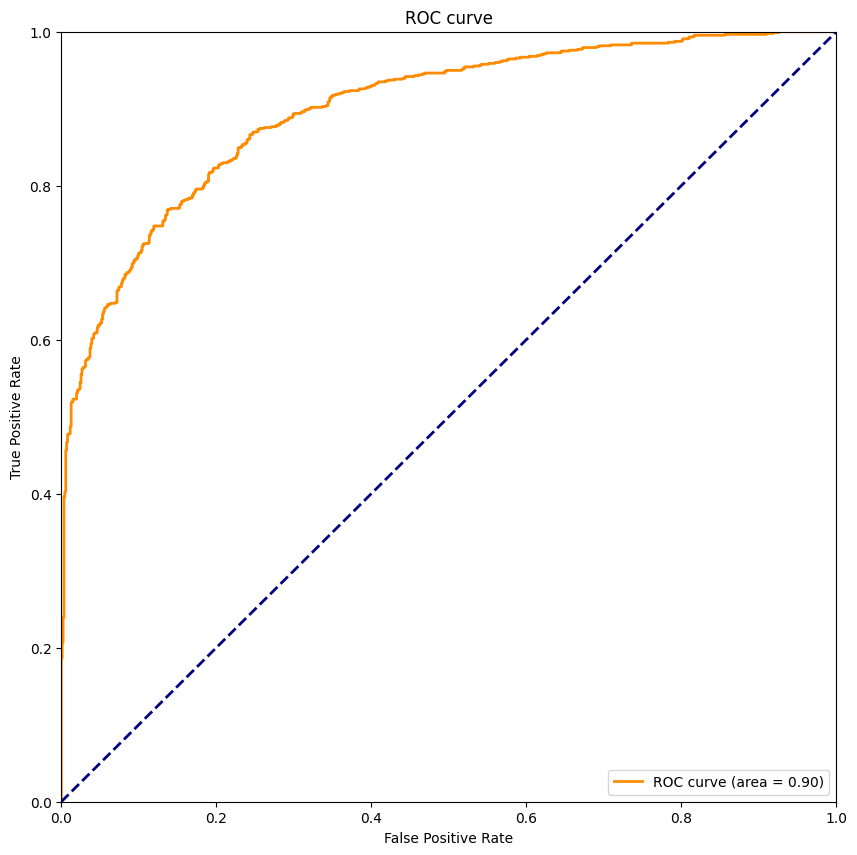

In [87]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()